# Plotting distributions
First, import relevant libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *


In [ ]:
import sys
sys.path.append('../../src/')
from utils.database import dbutils

conn = dbutils.connect()
cursor = conn.cursor()

Then, load the data (takes a few moments):

In [2]:
# Load data
dfc = pd.read_csv("/mnt/data/shared/aws-data/restricted-data/CDR-data/foreigners_counts_GEN.csv")
dfc.head()

,cust_id,country,calls,calls_in_florence,calls_in_florence_comune,towers,towers_in_florence,towers_in_florence_comune,days_active,days_active_in_florence,days_active_in_florence_comune
0,4794145,Germany,49135,2275,2,1054,70,1,37,10,1
1,18418469,Sweden,48094,6117,10,1813,106,1,116,79,10
2,3665186,Sweden,45927,5281,11,1742,122,3,88,42,8
3,10668243,Montenegro,44134,1667,283,5600,200,17,96,89,57
4,10558406,Sweden,43459,4744,27,1629,95,4,117,85,20


In [3]:
dft = pd.read_csv("/mnt/data/shared/aws-data/restricted-data/CDR-data/tower_counts_foreigners_GEN.csv")
dft.head()

,lat,lon,in_florence,in_florence_comune,calls,users,days
0,43.771,11.254,t,f,836777,247677,121
1,43.775,11.252,t,t,668811,185412,121
2,43.772,11.264,t,f,511725,133723,121
3,43.777,11.248,t,t,483219,159065,121
4,43.770,11.247,t,f,444093,95080,121


We want the following distributions:
1. Calls per user (all calls; calls in Florence province; calls in Florence city)
2. Days active per user (all days active; days active in Florence province; days active in Florence city)
3. Mean calls per day per user (mean calls per day overall; in Florence provice; in Florence city)
4. Users per tower (all towers; towers in Florence province; towers in Florence city)
5. Calls per tower (all towers; towers in Florence province; towers in Florence city)
6. Days active per tower (all towers; towers in Florence province; towers in Florence city)
7. Mean calls per day per user (all towers; towers in Florence province; towers in Florence city)

In [4]:
# 1.1, 1.2, 1.3
frc_ua = dfc['calls'].value_counts().to_frame()
frc_ua.columns = ['frequency']
frc_ua.index.name = 'calls'
frc_ua.reset_index(inplace=True)
frc_ua = frc_ua.sort_values('calls')
frc_ua['cumulative'] = frc_ua['frequency'].cumsum()/frc_ua['frequency'].sum()
frc_ua['ccdf'] = 1 - frc_ua['cumulative']

frc_up = dfc['calls_in_florence'].value_counts().to_frame()
frc_up.columns = ['frequency']
frc_up.index.name = 'calls_in_florence'
frc_up.reset_index(inplace=True)
frc_up = frc_up.sort_values('calls_in_florence')
frc_up['cumulative'] = frc_up['frequency'].cumsum()/frc_up['frequency'].sum()
frc_up['ccdf'] = 1 - frc_up['cumulative']

frc_uc = dfc['calls_in_florence_comune'].value_counts().to_frame()
frc_uc.columns = ['frequency']
frc_uc.index.name = 'calls_in_florence_comune'
frc_uc.reset_index(inplace=True)
frc_uc = frc_uc.sort_values('calls_in_florence_comune')
frc_uc['cumulative'] = frc_uc['frequency'].cumsum()/frc_uc['frequency'].sum()
frc_uc['ccdf'] = 1 - frc_uc['cumulative']

In [5]:
# 2.1, 2.2, 2.3
frc_da = dfc['days_active'].value_counts().to_frame()
frc_da.columns = ['frequency']
frc_da.index.name = 'days_active'
frc_da.reset_index(inplace=True)
frc_da = frc_da.sort_values('days_active')
frc_da['cumulative'] = frc_da['frequency'].cumsum()/frc_da['frequency'].sum()
frc_da['ccdf'] = 1 - frc_da['cumulative']

frc_dp = dfc['days_active_in_florence'].value_counts().to_frame()
frc_dp.columns = ['frequency']
frc_dp.index.name = 'days_active_in_florence'
frc_dp.reset_index(inplace=True)
frc_dp = frc_dp.sort_values('days_active_in_florence')
frc_dp['cumulative'] = frc_dp['frequency'].cumsum()/frc_dp['frequency'].sum()
frc_dp['ccdf'] = 1 - frc_dp['cumulative']

frc_dc = dfc['days_active_in_florence_comune'].value_counts().to_frame()
frc_dc.columns = ['frequency']
frc_dc.index.name = 'days_active_in_florence_comune'
frc_dc.reset_index(inplace=True)
frc_dc = frc_dc.sort_values('days_active_in_florence_comune')
frc_dc['cumulative'] = frc_dc['frequency'].cumsum()/frc_dc['frequency'].sum()
frc_dc['ccdf'] = 1 - frc_dc['cumulative']

In [6]:
# 4.1, 4.2, 4.3
frt_ua = dft['users'].value_counts().to_frame()
frt_ua.columns = ['frequency']
frt_ua.index.name = 'users'
frt_ua.reset_index(inplace=True)
frt_ua = frt_ua.sort_values('users')
frt_ua['cumulative'] = frt_ua['frequency'].cumsum()/frt_ua['frequency'].sum()
frt_ua['ccdf'] = 1 - frt_ua['cumulative']

frt_up = dft[dft['in_florence']=='t']['users'].value_counts().to_frame()
frt_up.columns = ['frequency']
frt_up.index.name = 'users'
frt_up.reset_index(inplace=True)
frt_up = frt_up.sort_values('users')
frt_up['cumulative'] = frt_up['frequency'].cumsum()/frt_up['frequency'].sum()
frt_up['ccdf'] = 1 - frt_up['cumulative']

frt_uc = dft[dft['in_florence_comune']=='t']['users'].value_counts().to_frame()
frt_uc.columns = ['frequency']
frt_uc.index.name = 'users'
frt_uc.reset_index(inplace=True)
frt_uc = frt_uc.sort_values('users')
frt_uc['cumulative'] = frt_uc['frequency'].cumsum()/frt_uc['frequency'].sum()
frt_uc['ccdf'] = 1 - frt_uc['cumulative']

# 5.1, 5.2, 5.3
frt_ca = dft['calls'].value_counts().to_frame()
frt_ca.columns = ['frequency']
frt_ca.index.name = 'calls'
frt_ca.reset_index(inplace=True)
frt_ca = frt_ca.sort_values('calls')
frt_ca['cumulative'] = frt_ca['frequency'].cumsum()/frt_ca['frequency'].sum()
frt_ca['ccdf'] = 1 - frt_ca['cumulative']

frt_cp = dft[dft['in_florence']=='t']['calls'].value_counts().to_frame()
frt_cp.columns = ['frequency']
frt_cp.index.name = 'calls'
frt_cp.reset_index(inplace=True)
frt_cp = frt_cp.sort_values('calls')
frt_cp['cumulative'] = frt_cp['frequency'].cumsum()/frt_cp['frequency'].sum()
frt_cp['ccdf'] = 1 - frt_cp['cumulative']

frt_cc = dft[dft['in_florence_comune']=='t']['calls'].value_counts().to_frame()
frt_cc.columns = ['frequency']
frt_cc.index.name = 'calls'
frt_cc.reset_index(inplace=True)
frt_cc = frt_cc.sort_values('calls')
frt_cc['cumulative'] = frt_cc['frequency'].cumsum()/frt_cc['frequency'].sum()
frt_cc['ccdf'] = 1 - frt_cc['cumulative']

# 6.1, 6.2, 6.3
frt_da = dft['days'].value_counts().to_frame()
frt_da.columns = ['frequency']
frt_da.index.name = 'days'
frt_da.reset_index(inplace=True)
frt_da = frt_da.sort_values('days')
frt_da['cumulative'] = frt_da['frequency'].cumsum()/frt_da['frequency'].sum()
frt_da['ccdf'] = 1 - frt_da['cumulative']

frt_dp = dft[dft['in_florence']=='t']['days'].value_counts().to_frame()
frt_dp.columns = ['frequency']
frt_dp.index.name = 'days'
frt_dp.reset_index(inplace=True)
frt_dp = frt_dp.sort_values('days')
frt_dp['cumulative'] = frt_dp['frequency'].cumsum()/frt_dp['frequency'].sum()
frt_dp['ccdf'] = 1 - frt_dp['cumulative']

frt_dc = dft[dft['in_florence_comune']=='t']['days'].value_counts().to_frame()
frt_dc.columns = ['frequency']
frt_dc.index.name = 'days'
frt_dc.reset_index(inplace=True)
frt_dc = frt_dc.sort_values('days')
frt_dc['cumulative'] = frt_dc['frequency'].cumsum()/frt_dc['frequency'].sum()
frt_dc['ccdf'] = 1 - frt_dc['cumulative']

In [7]:
# frc_uc.plot.scatter(y='frequency',x='calls_in_florence_comune', logy=True, figsize=(10,10))

In [8]:
frc2 = dfc[dfc['calls_in_florence_comune']>0]['calls'].value_counts().to_frame()
frc2.columns = ['frequency']
frc2.index.name = 'calls'
frc2.reset_index(inplace=True)
frc2 = frc2.sort_values('calls')
frc2['cumulative'] = frc2['frequency'].cumsum()/frc2['frequency'].sum()
frc2['ccdf'] = 1 - frc2['cumulative']

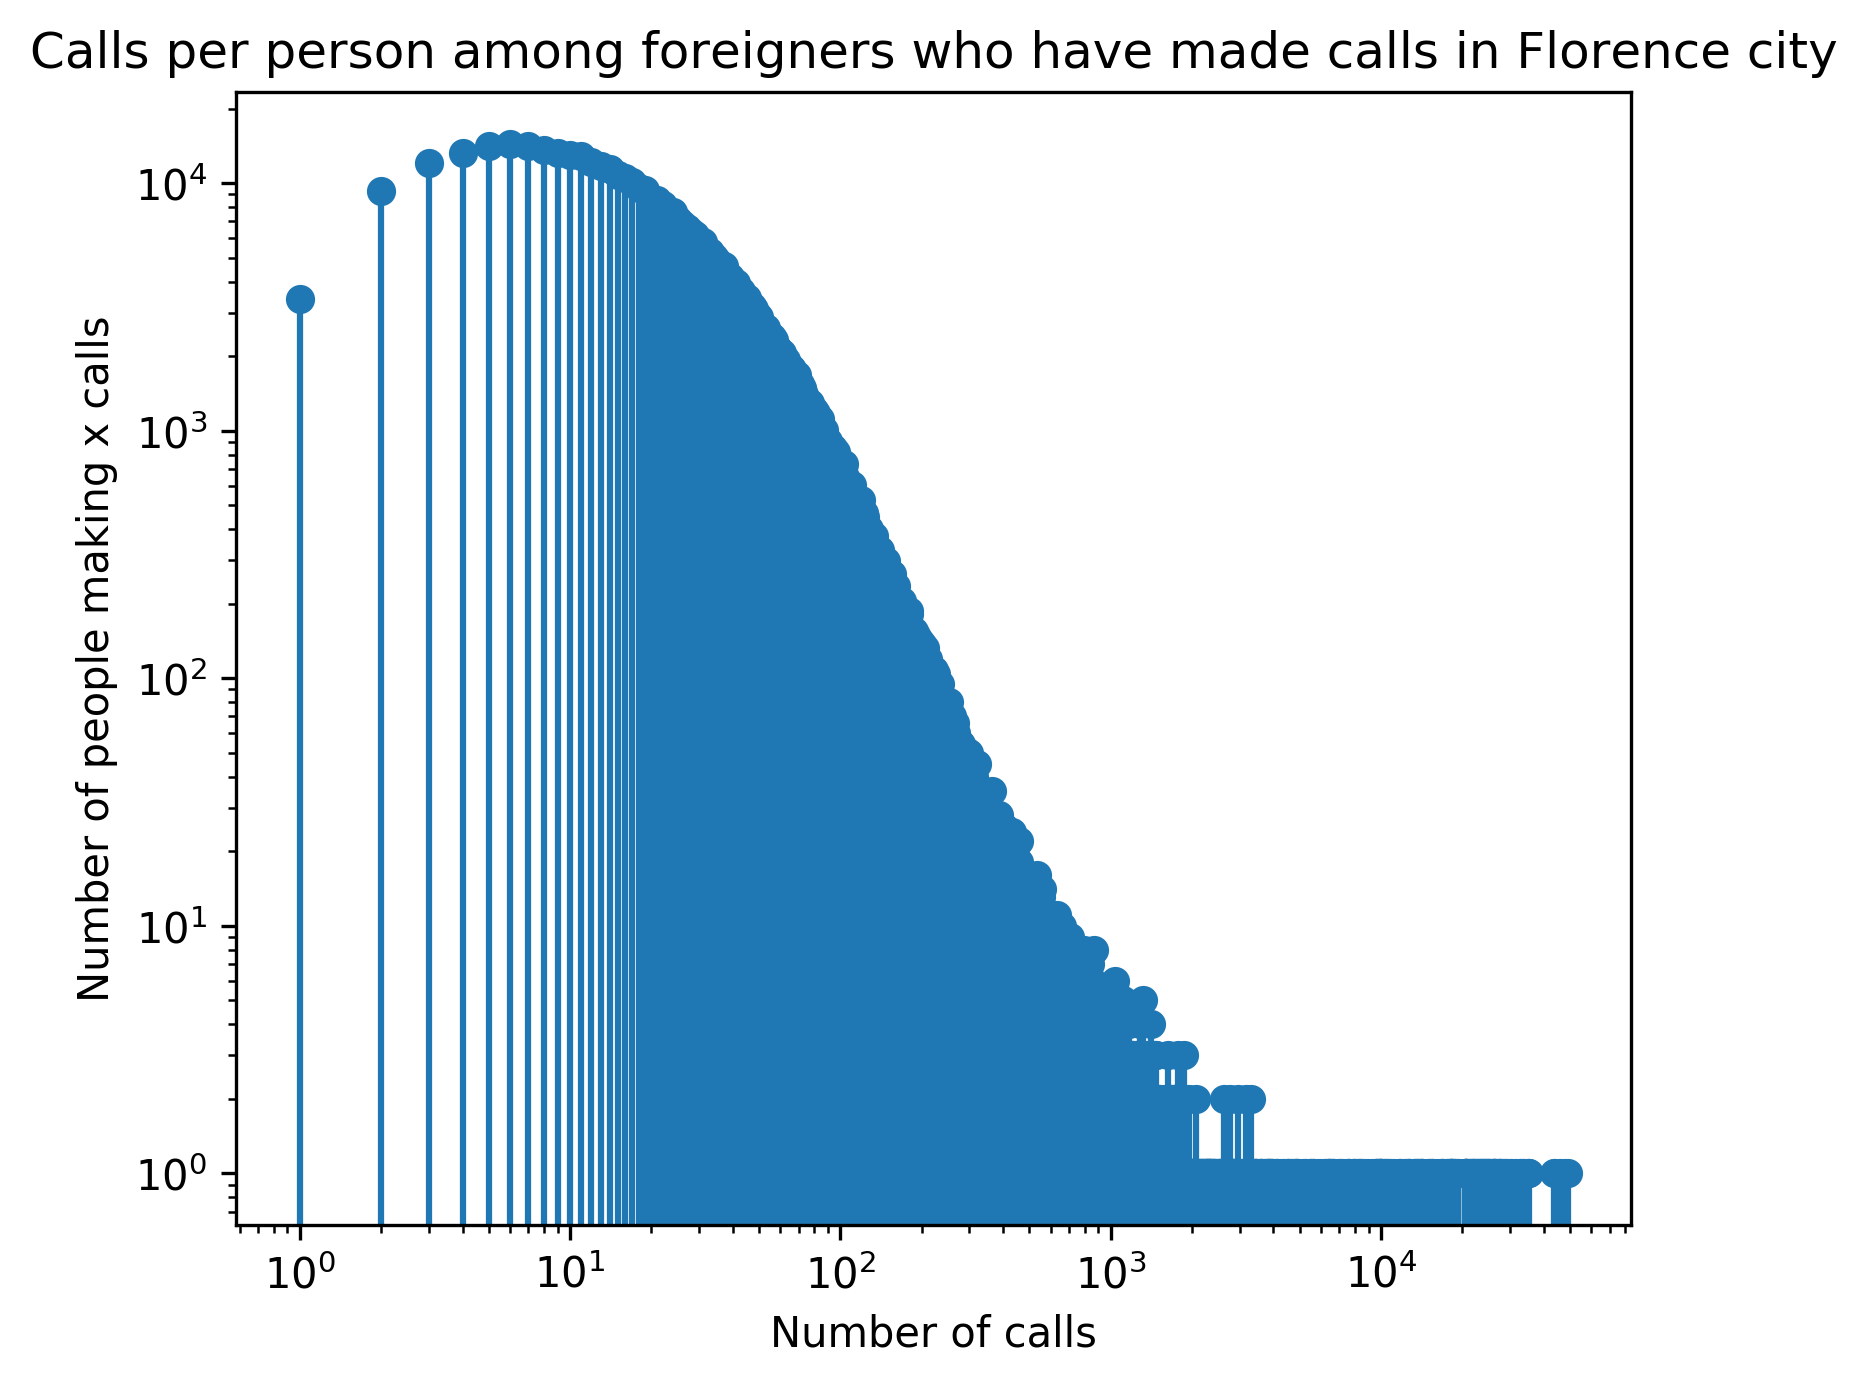

In [9]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc2['calls'],frc2['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Calls per person among foreigners who have made calls in Florence city')
ax.set_ylabel('Number of people making x calls')
ax.set_xlabel('Number of calls')
plt.show()

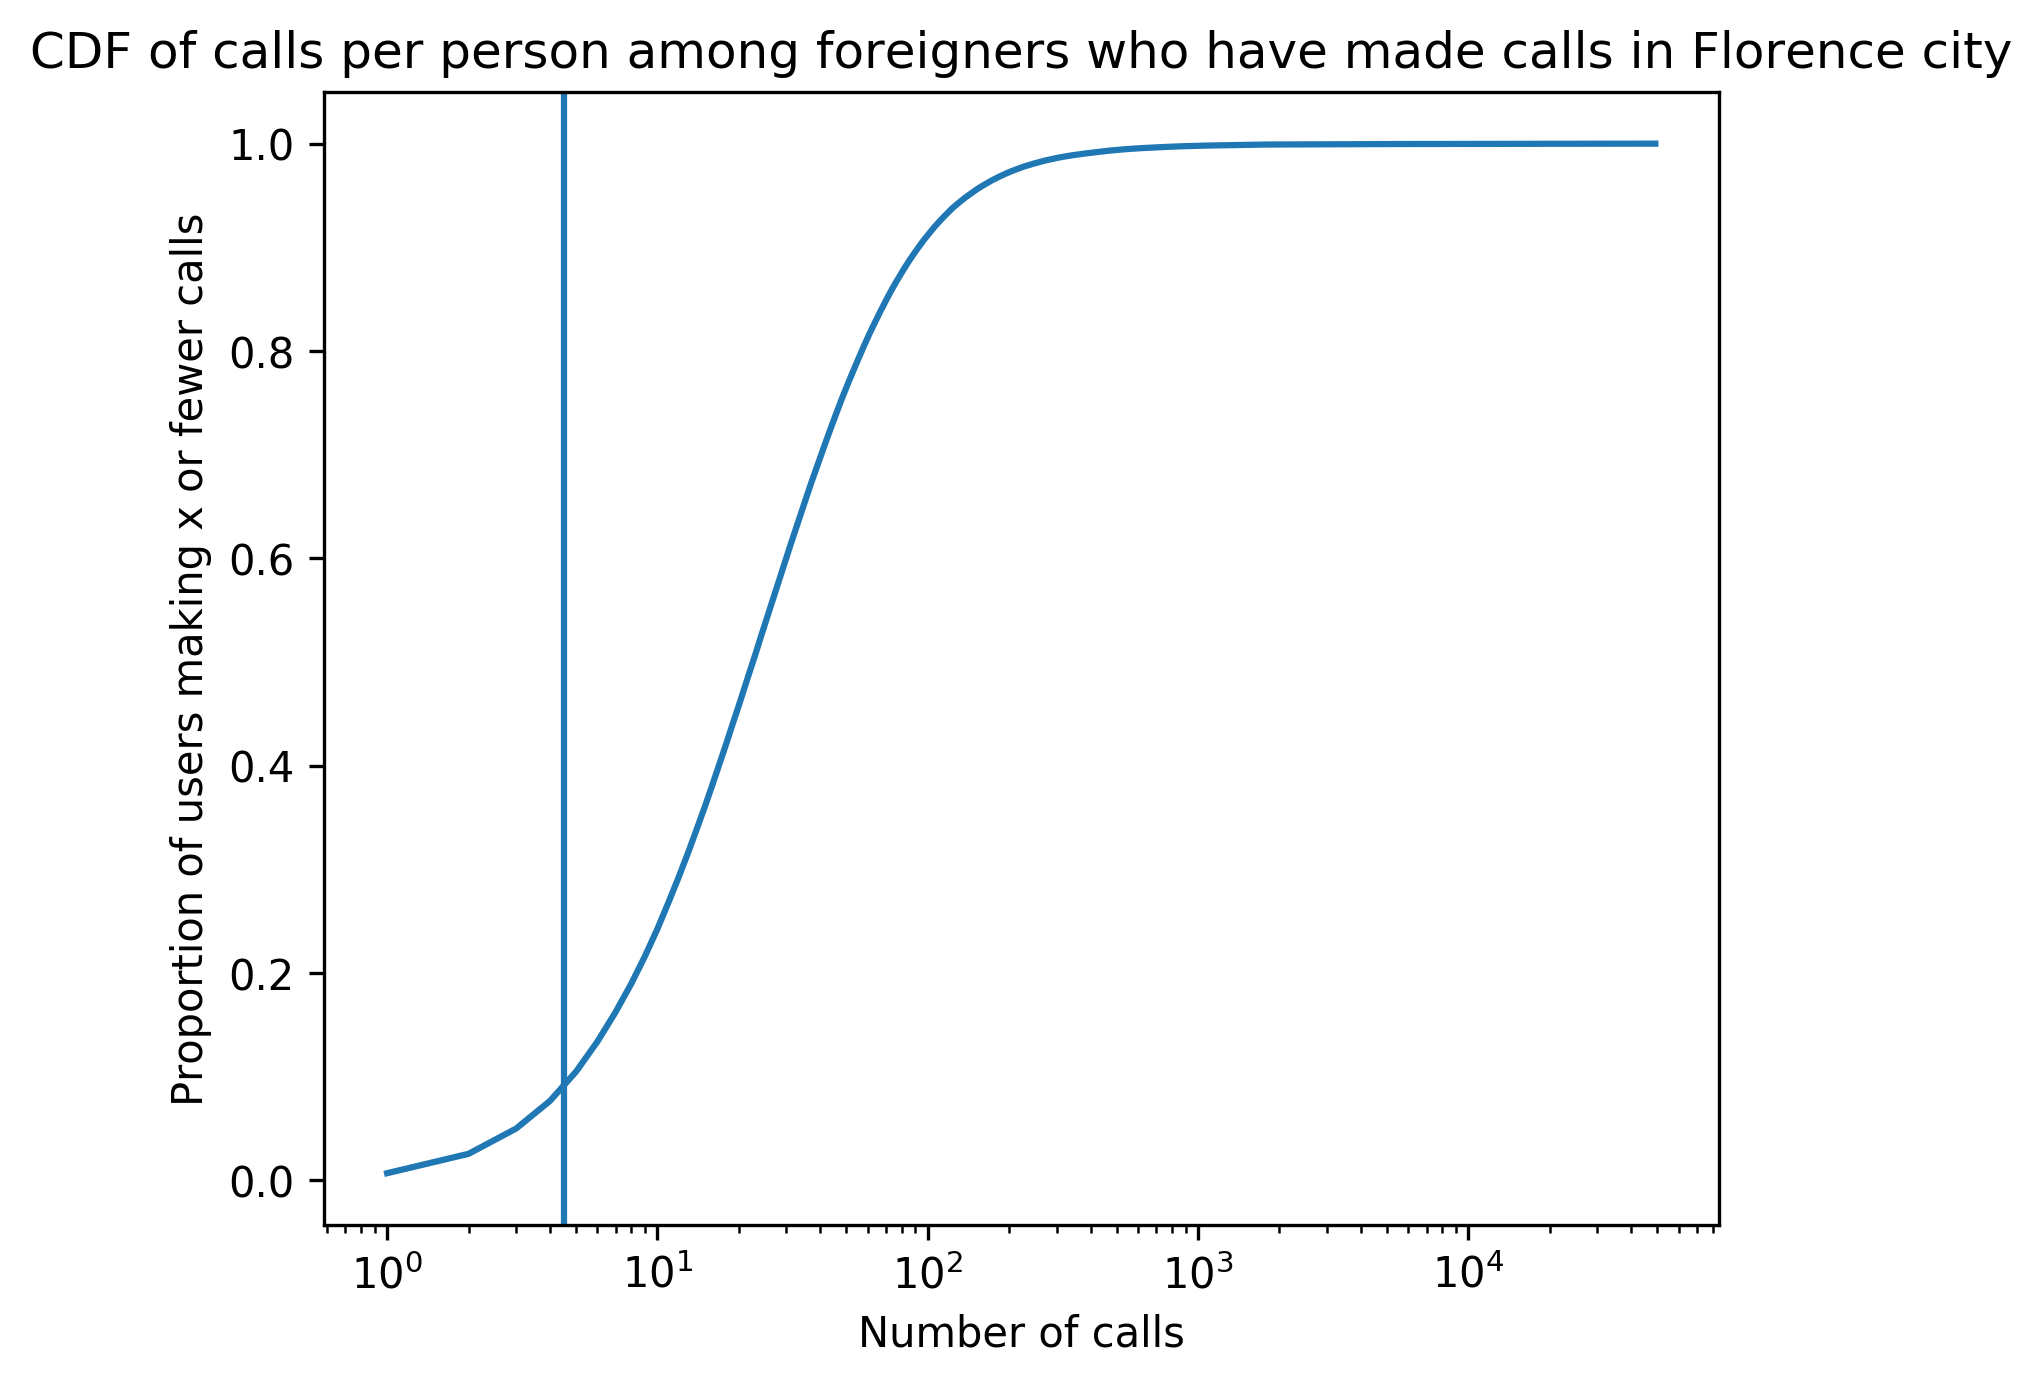

In [10]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc2['calls'],frc2['cumulative'])
# yscale('log')
xscale('log')
# ylim([.7,1.01])
ax.set_title('CDF of calls per person among foreigners who have made calls in Florence city')
ax.set_ylabel('Proportion of users making x or fewer calls')
ax.set_xlabel('Number of calls')
axvline(4.5) # Our cutoff
# axhline(.1)
plt.show()

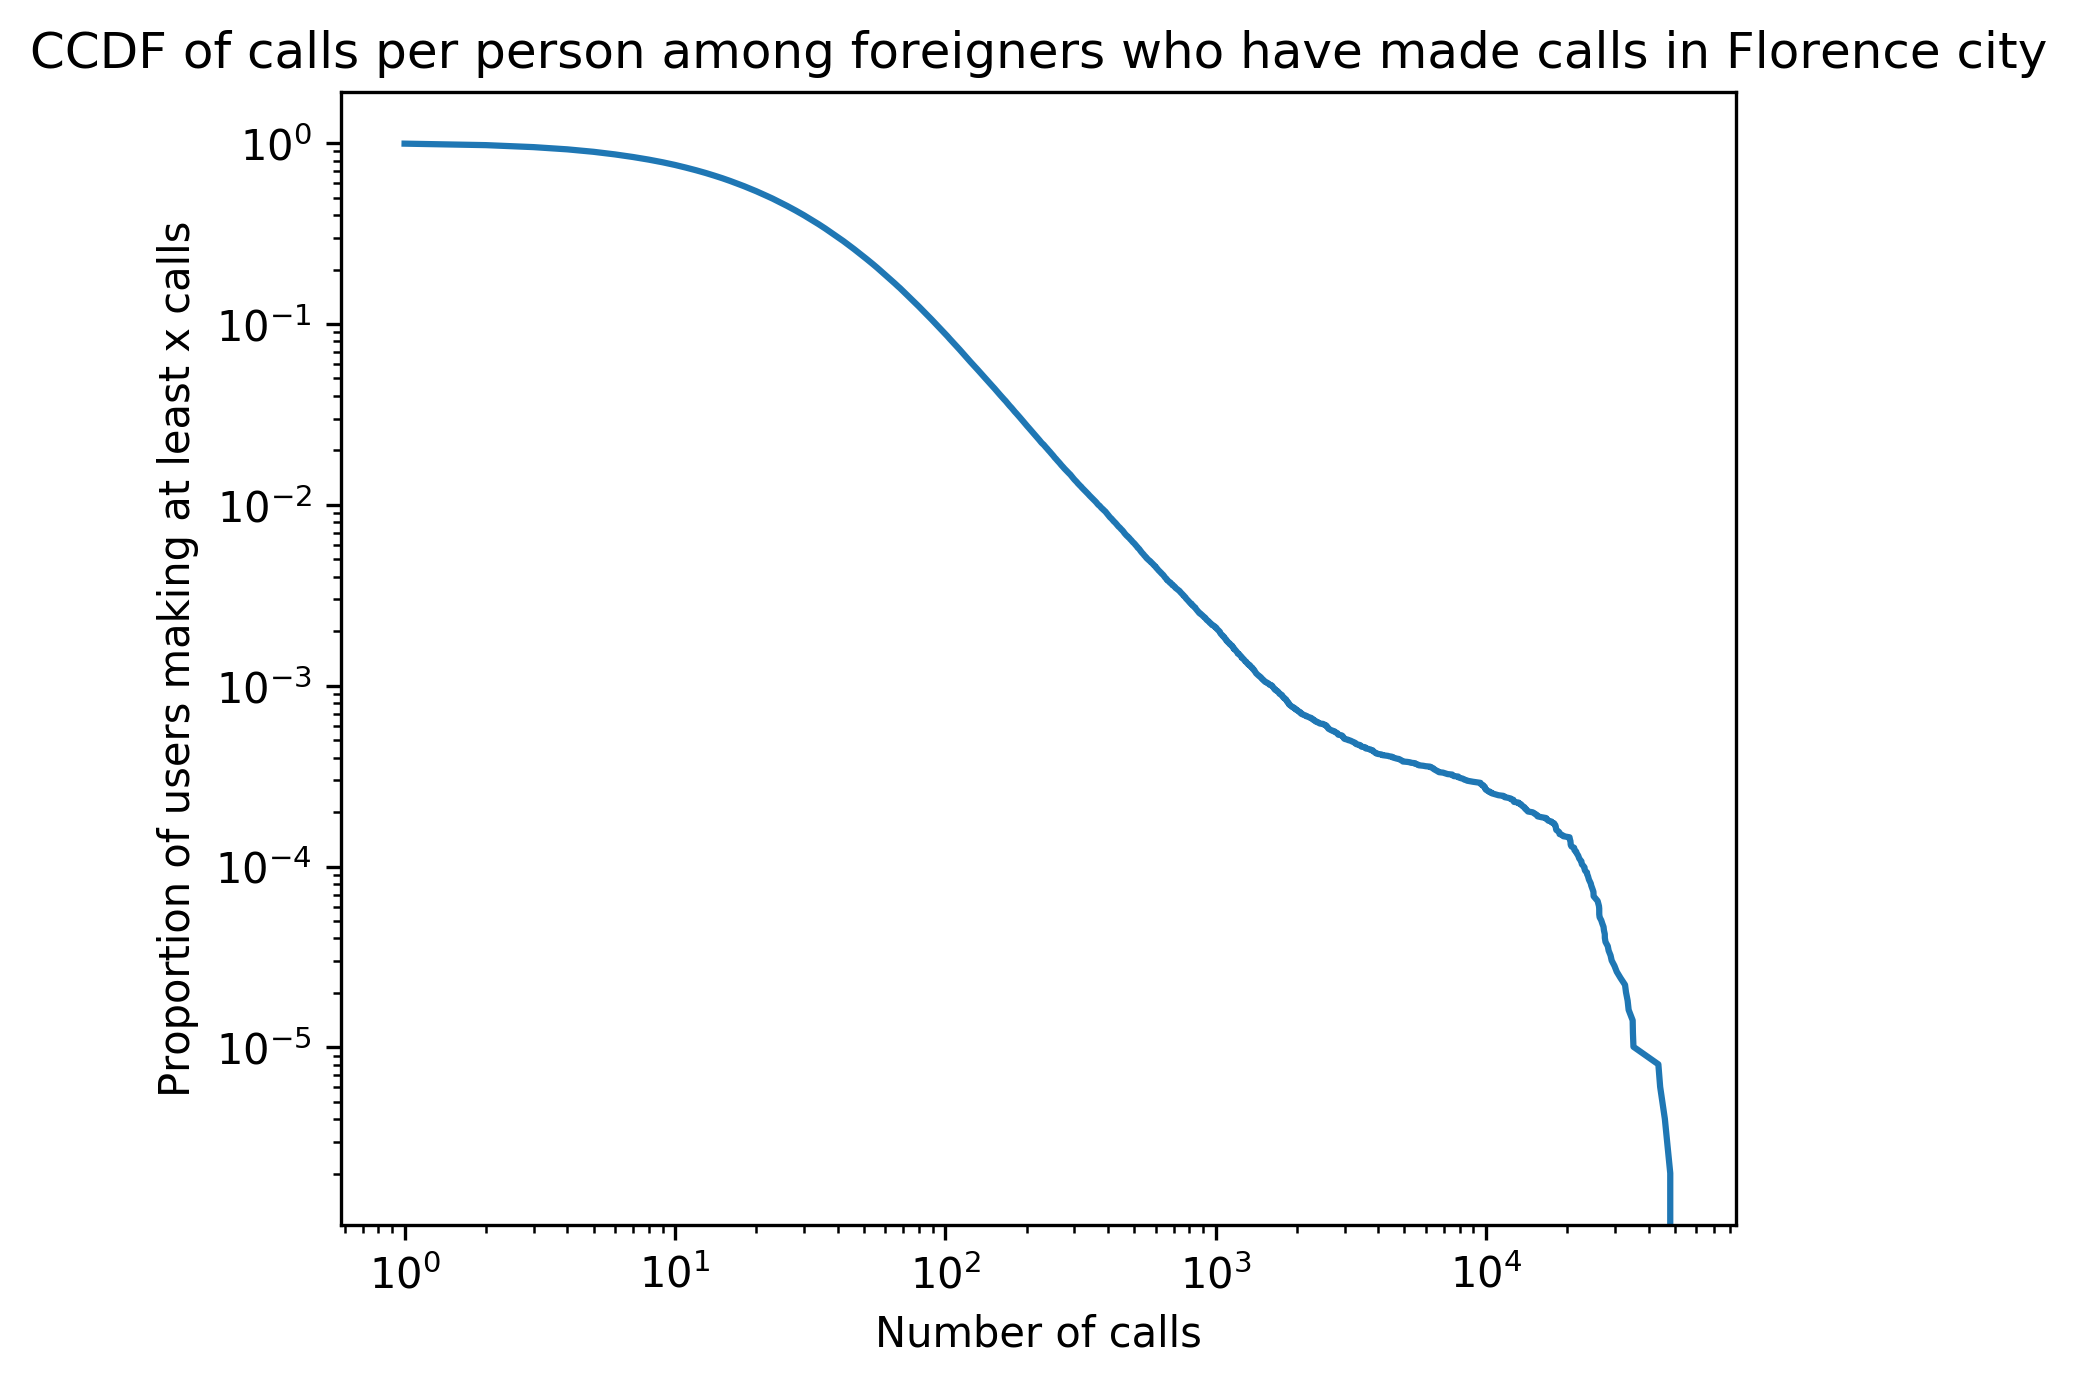

In [11]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc2['calls'],frc2['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of calls per person among foreigners who have made calls in Florence city')
ax.set_ylabel('Proportion of users making at least x calls')
ax.set_xlabel('Number of calls')
plt.show()

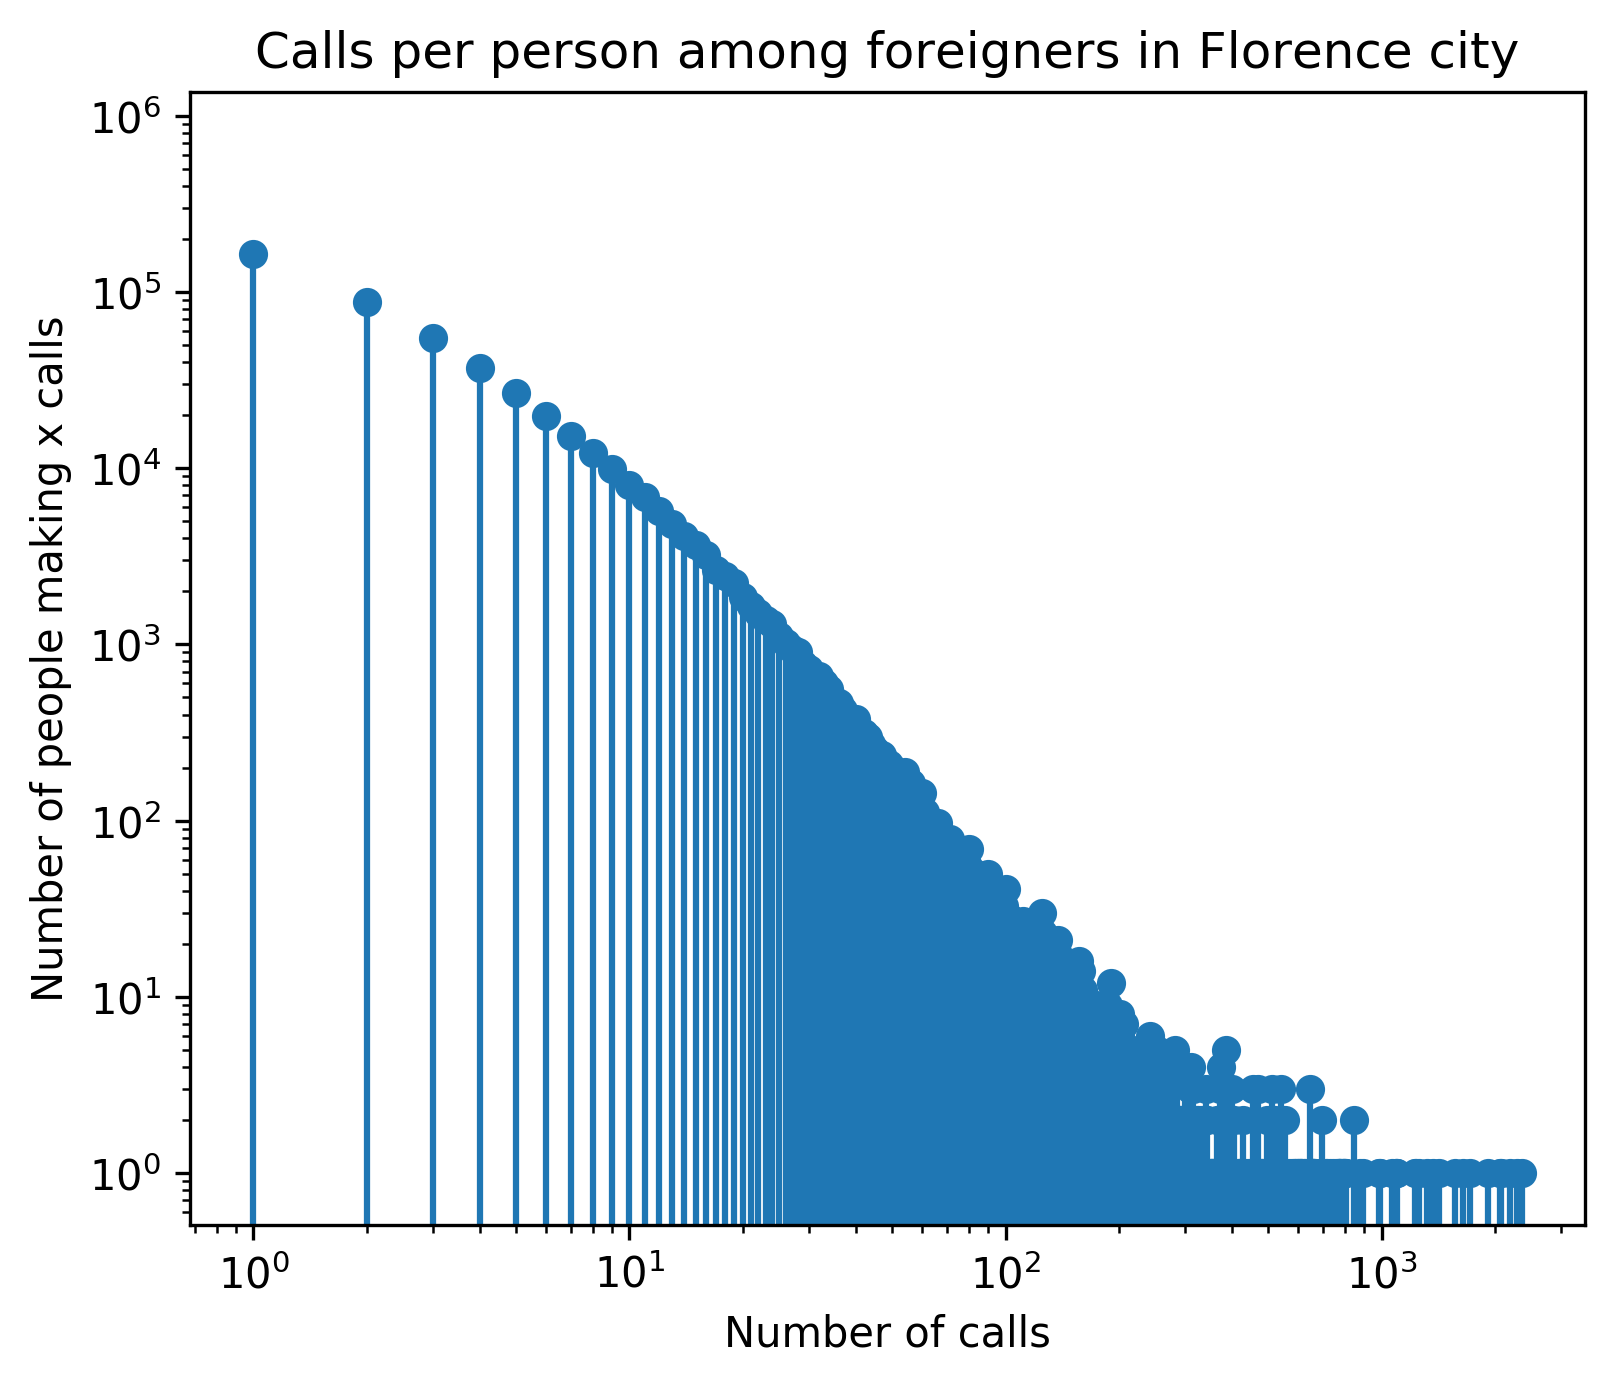

In [12]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc_uc['calls_in_florence_comune'],frc_uc['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Calls per person among foreigners in Florence city')
ax.set_ylabel('Number of people making x calls')
ax.set_xlabel('Number of calls')
plt.show()

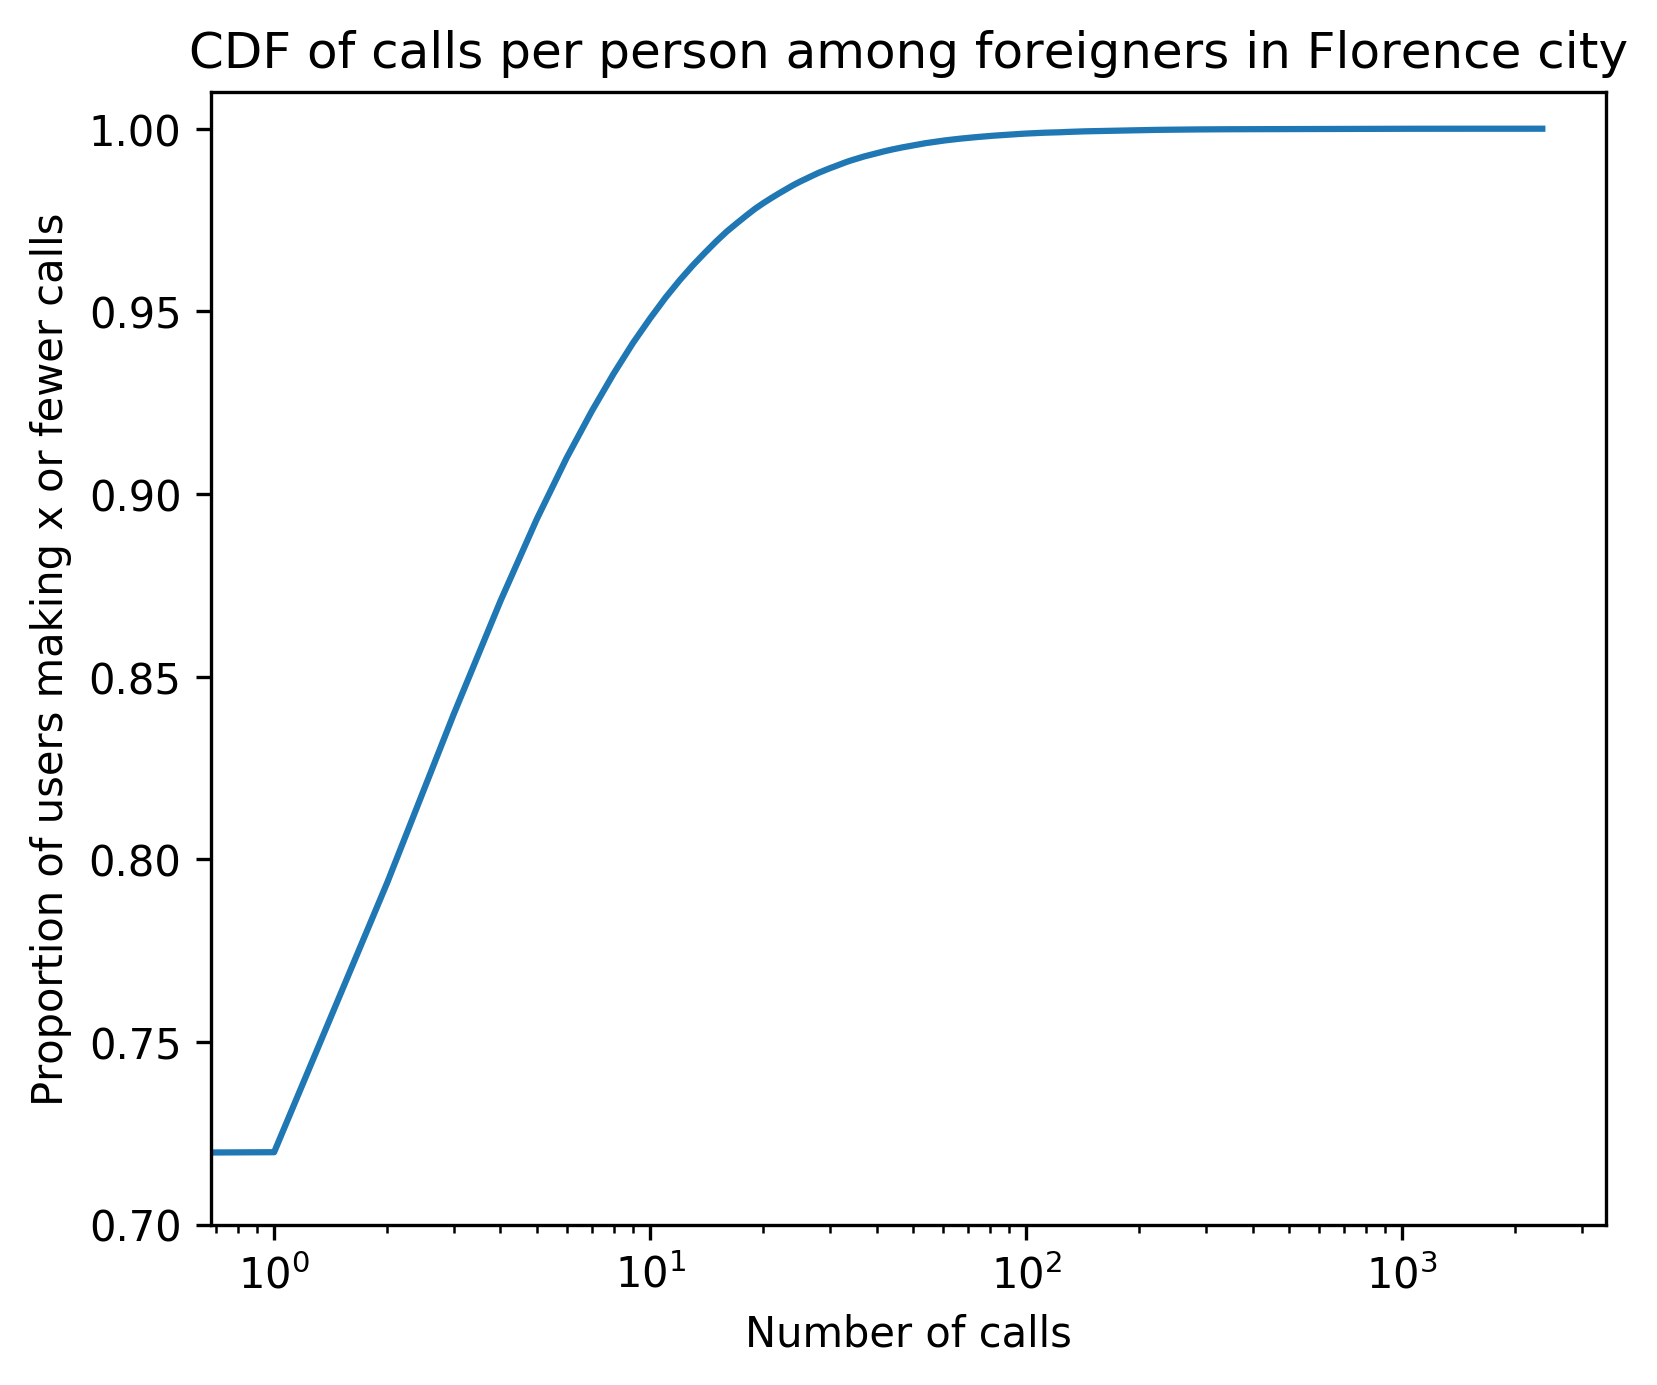

In [13]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_uc['calls_in_florence_comune'],frc_uc['cumulative'])
# yscale('log')
xscale('log')
ylim([.7,1.01])
ax.set_title('CDF of calls per person among foreigners in Florence city')
ax.set_ylabel('Proportion of users making x or fewer calls')
ax.set_xlabel('Number of calls')
plt.show()

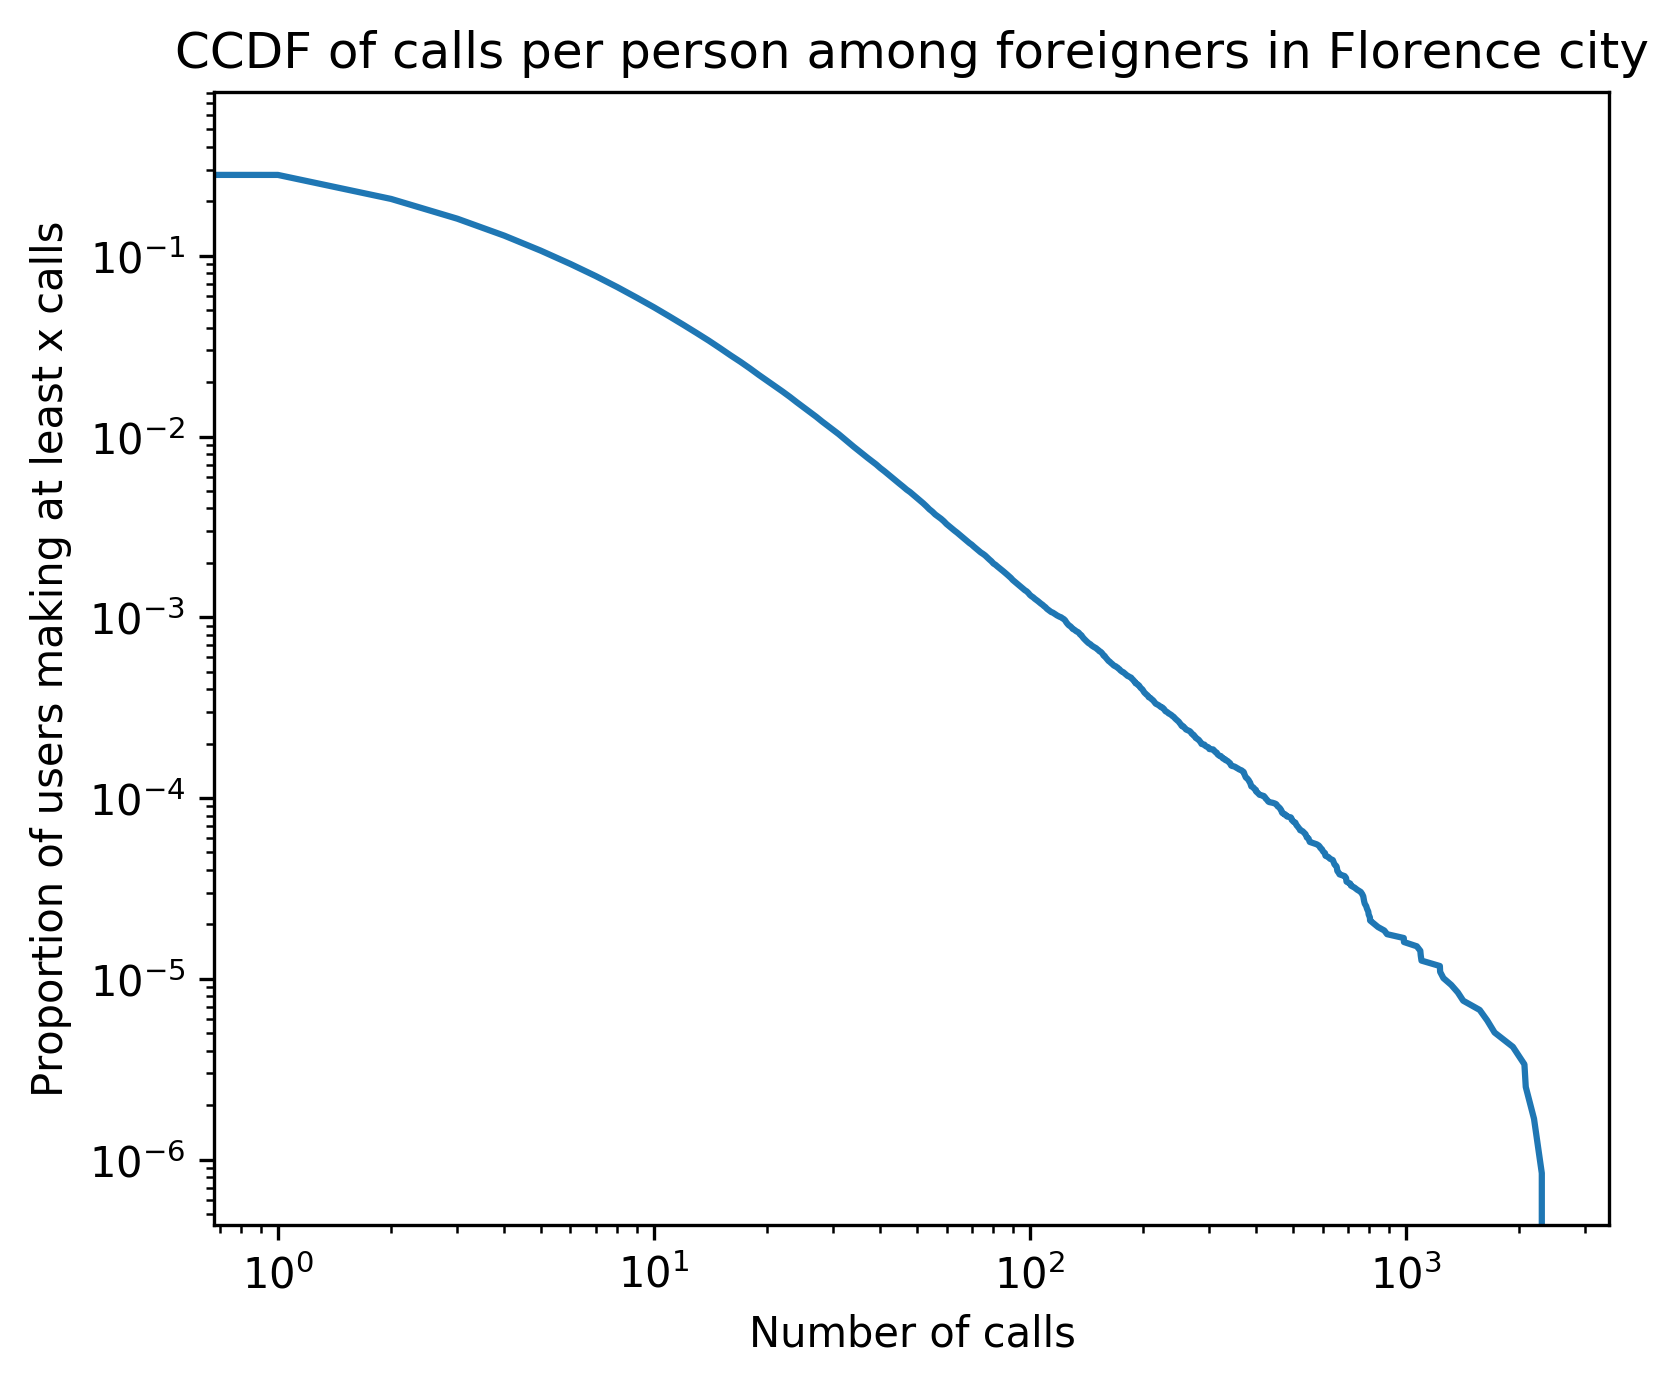

In [14]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_uc['calls_in_florence_comune'],frc_uc['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of calls per person among foreigners in Florence city')
ax.set_ylabel('Proportion of users making at least x calls')
ax.set_xlabel('Number of calls')
plt.show()

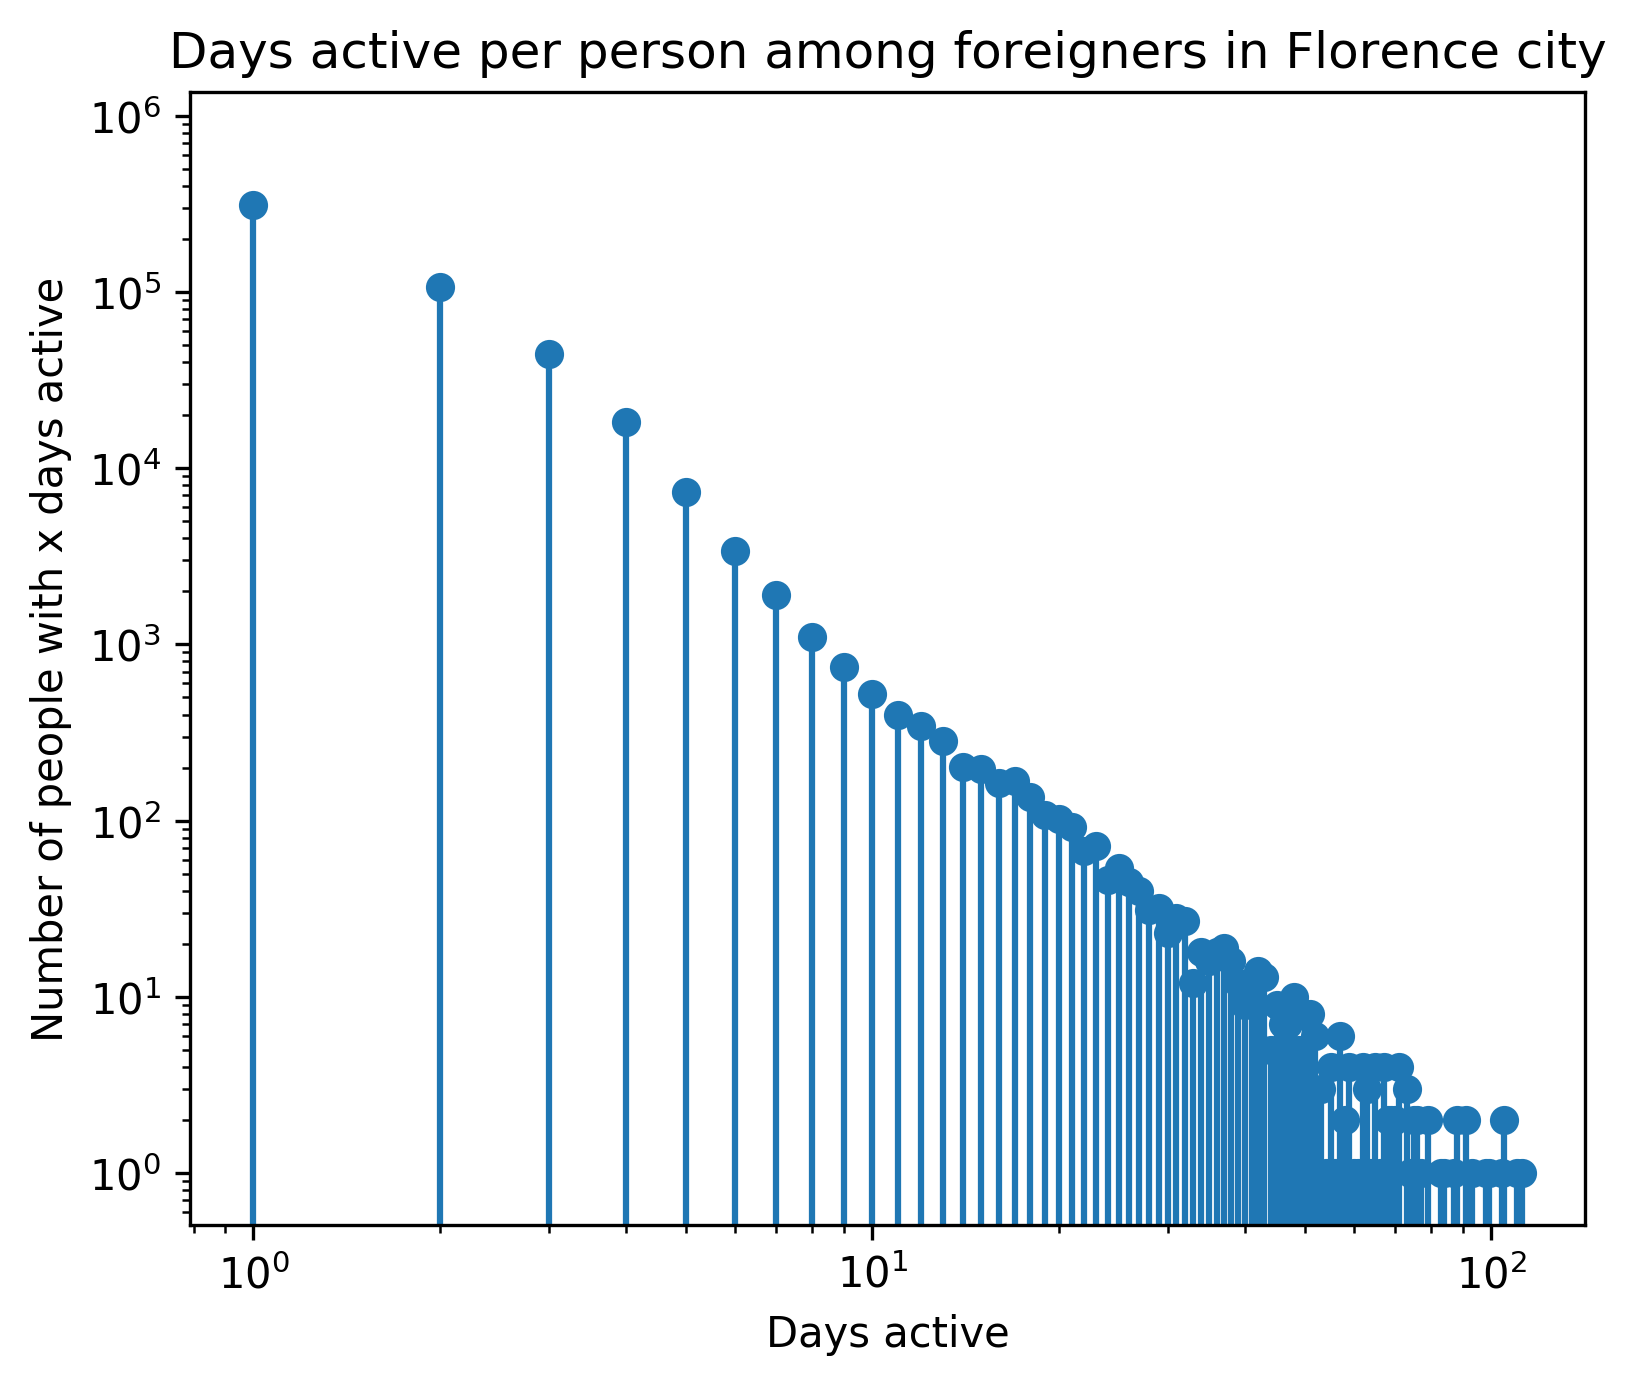

In [15]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc_dc['days_active_in_florence_comune'],frc_dc['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Days active per person among foreigners in Florence city')
ax.set_ylabel('Number of people with x days active')
ax.set_xlabel('Days active')
plt.show()

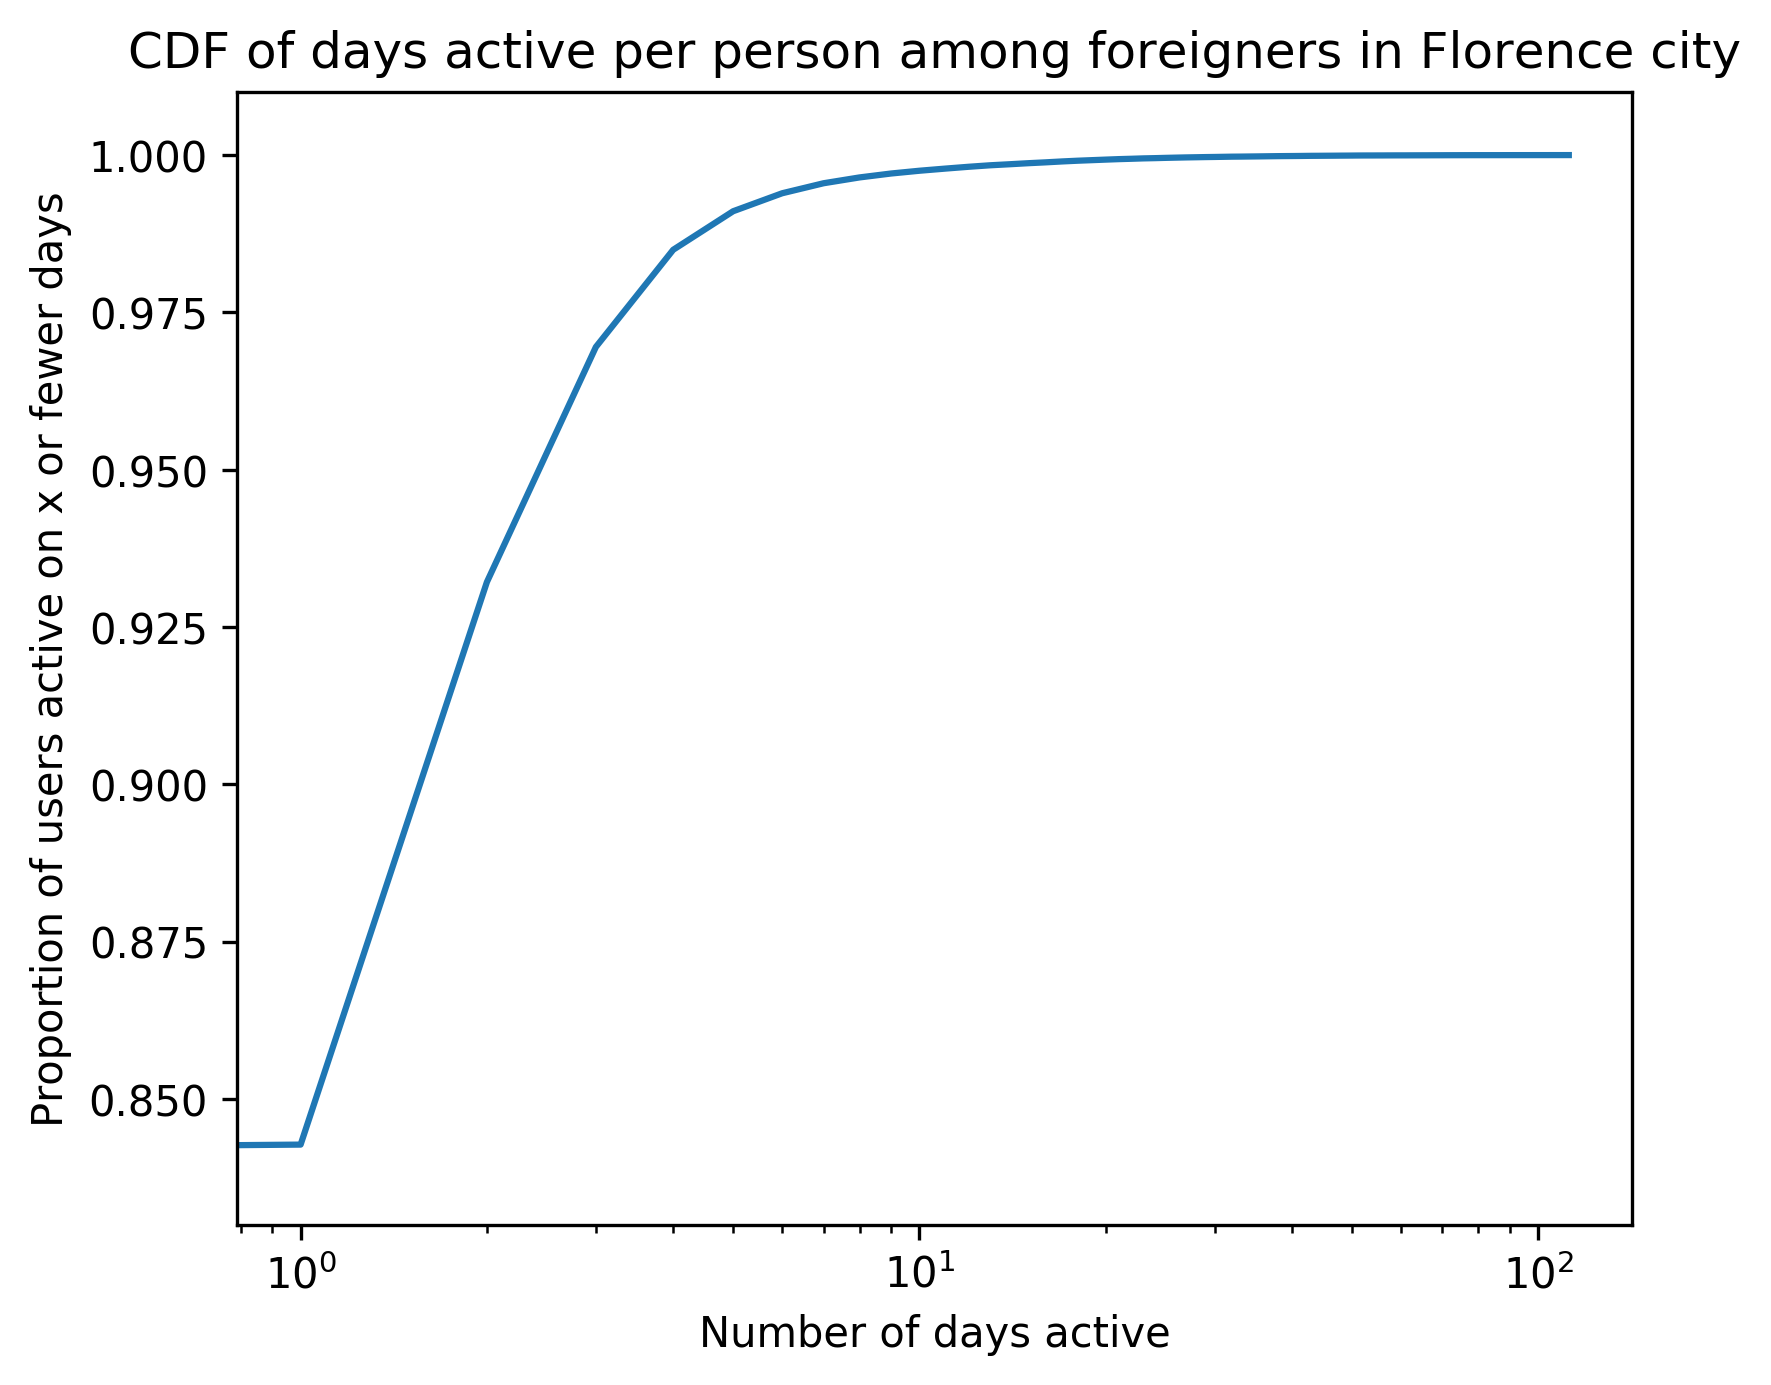

In [16]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_dc['days_active_in_florence_comune'],frc_dc['cumulative'])
# yscale('log')
xscale('log')
ylim([.83,1.01])
ax.set_title('CDF of days active per person among foreigners in Florence city')
ax.set_ylabel('Proportion of users active on x or fewer days')
ax.set_xlabel('Number of days active')
plt.show()

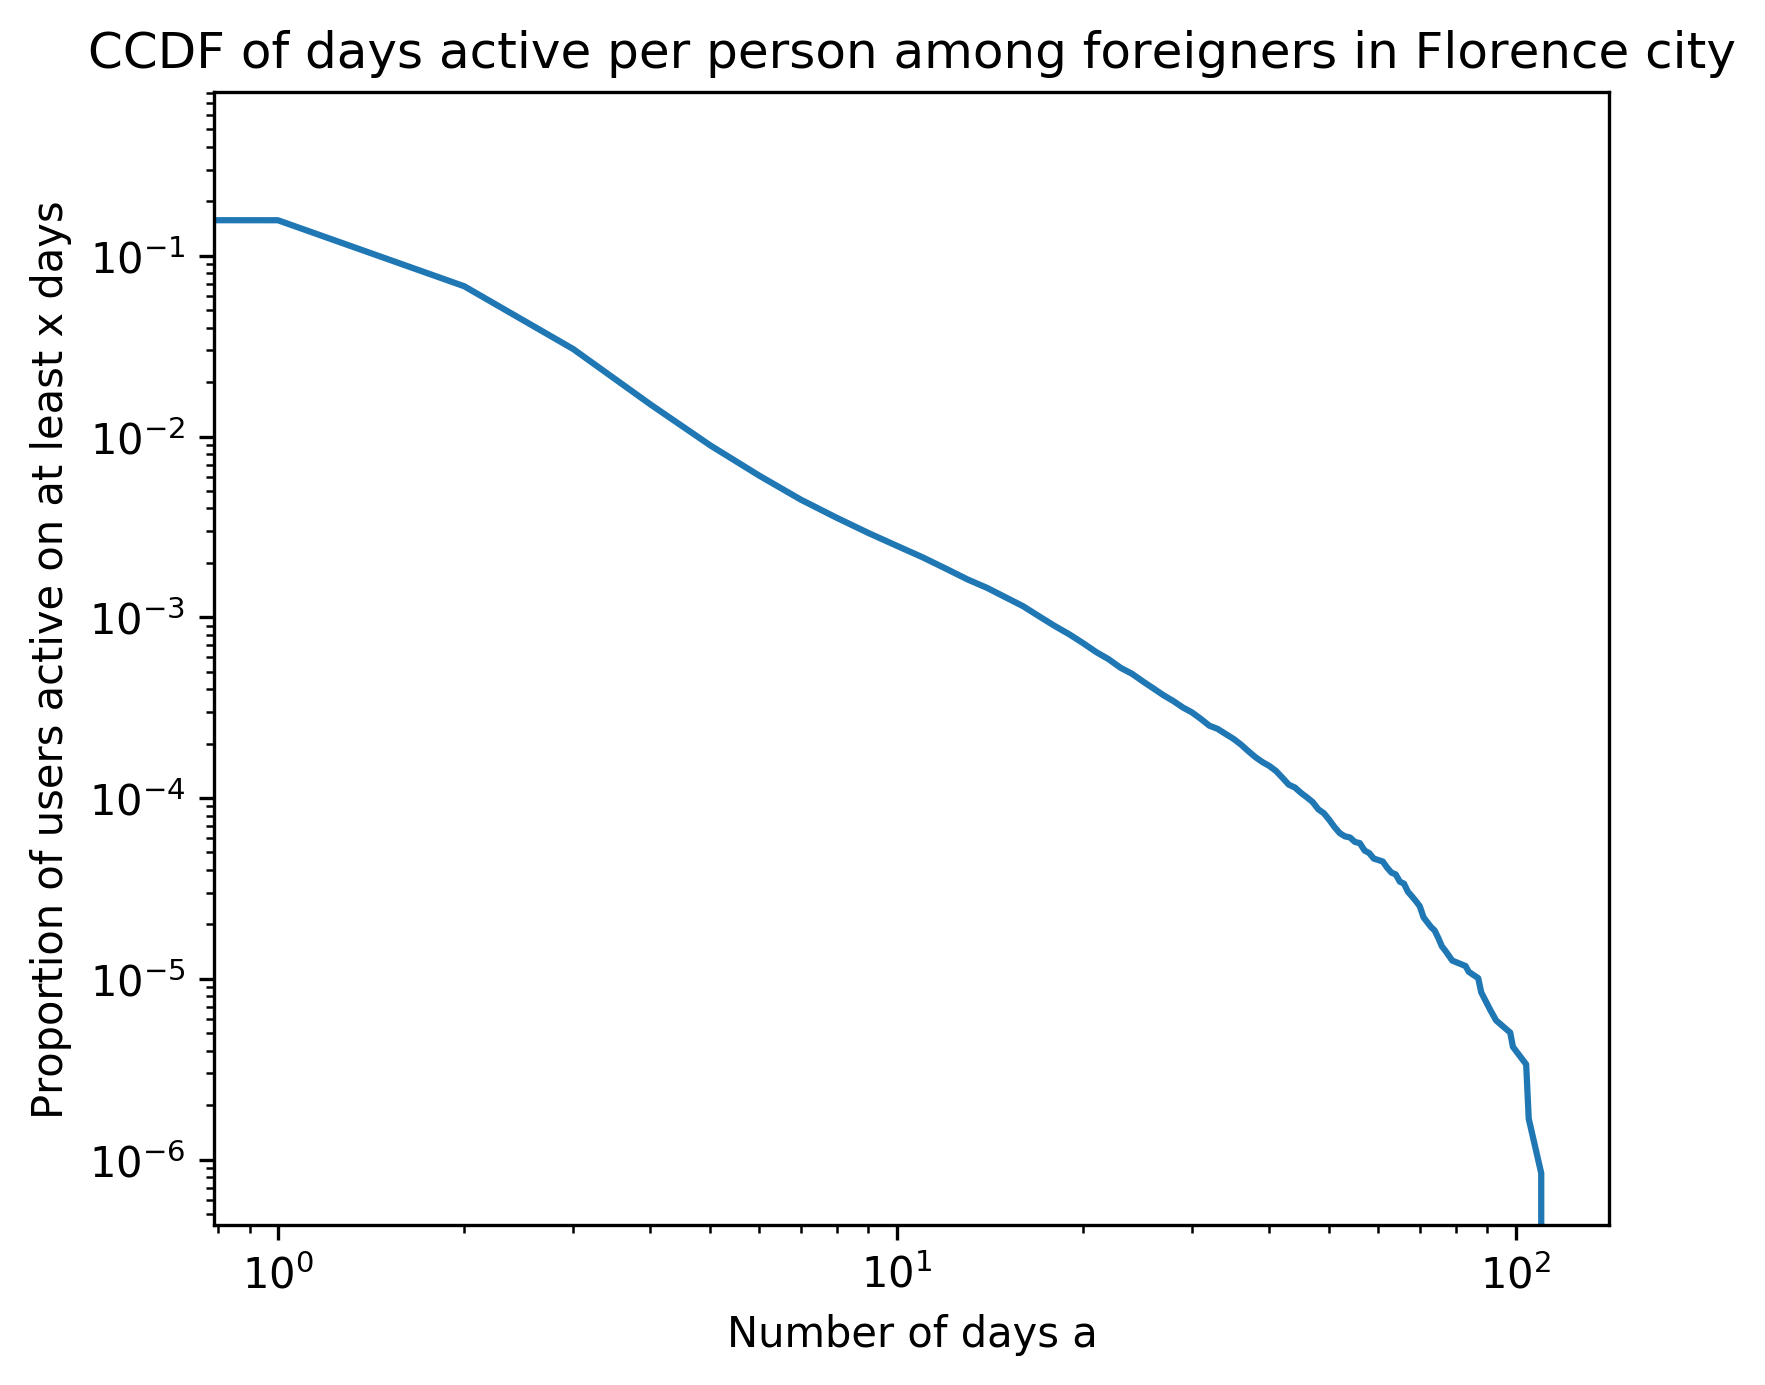

In [17]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_dc['days_active_in_florence_comune'],frc_dc['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of days active per person among foreigners in Florence city')
ax.set_ylabel('Proportion of users active on at least x days')
ax.set_xlabel('Number of days a')
plt.show()

In [18]:
dfc['mean_calls_per_day'] = dfc['calls']/dfc['days_active']
dfc[dfc['calls_in_florence_comune']>0].head()

,cust_id,country,calls,calls_in_florence,calls_in_florence_comune,towers,towers_in_florence,towers_in_florence_comune,days_active,days_active_in_florence,days_active_in_florence_comune,mean_calls_per_day
0,4794145,Germany,49135,2275,2,1054,70,1,37,10,1,1327.972973
1,18418469,Sweden,48094,6117,10,1813,106,1,116,79,10,414.603448
2,3665186,Sweden,45927,5281,11,1742,122,3,88,42,8,521.897727
3,10668243,Montenegro,44134,1667,283,5600,200,17,96,89,57,459.729167
4,10558406,Sweden,43459,4744,27,1629,95,4,117,85,20,371.444444


In [19]:
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].max()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].min()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].median()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()*2+dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()*3+dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()

1504.28571429
1.0
7.57032290564
5.0
13.6172888686
34.8049006429
48.4221895115


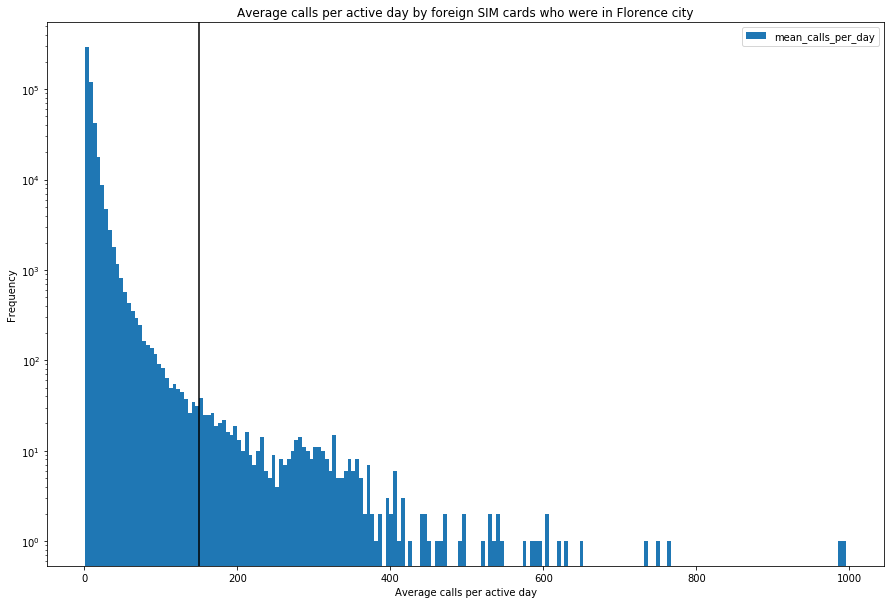

In [30]:
dfc[(dfc['calls_in_florence_comune']>0)&(dfc['mean_calls_per_day']<1000)].plot.hist(y='mean_calls_per_day', logy=True, figsize=(15,10), bins=200)
plt.ylabel('Frequency')
plt.xlabel('Average calls per active day')
plt.axvline(150,color="black")
# plt.xlim([0,1000])
plt.title('Average calls per active day by foreign SIM cards who were in Florence city')

In [21]:
# dfc.plot.scatter(x='calls',y='days_active',figsize=(15,10),logy=True,logx=True)

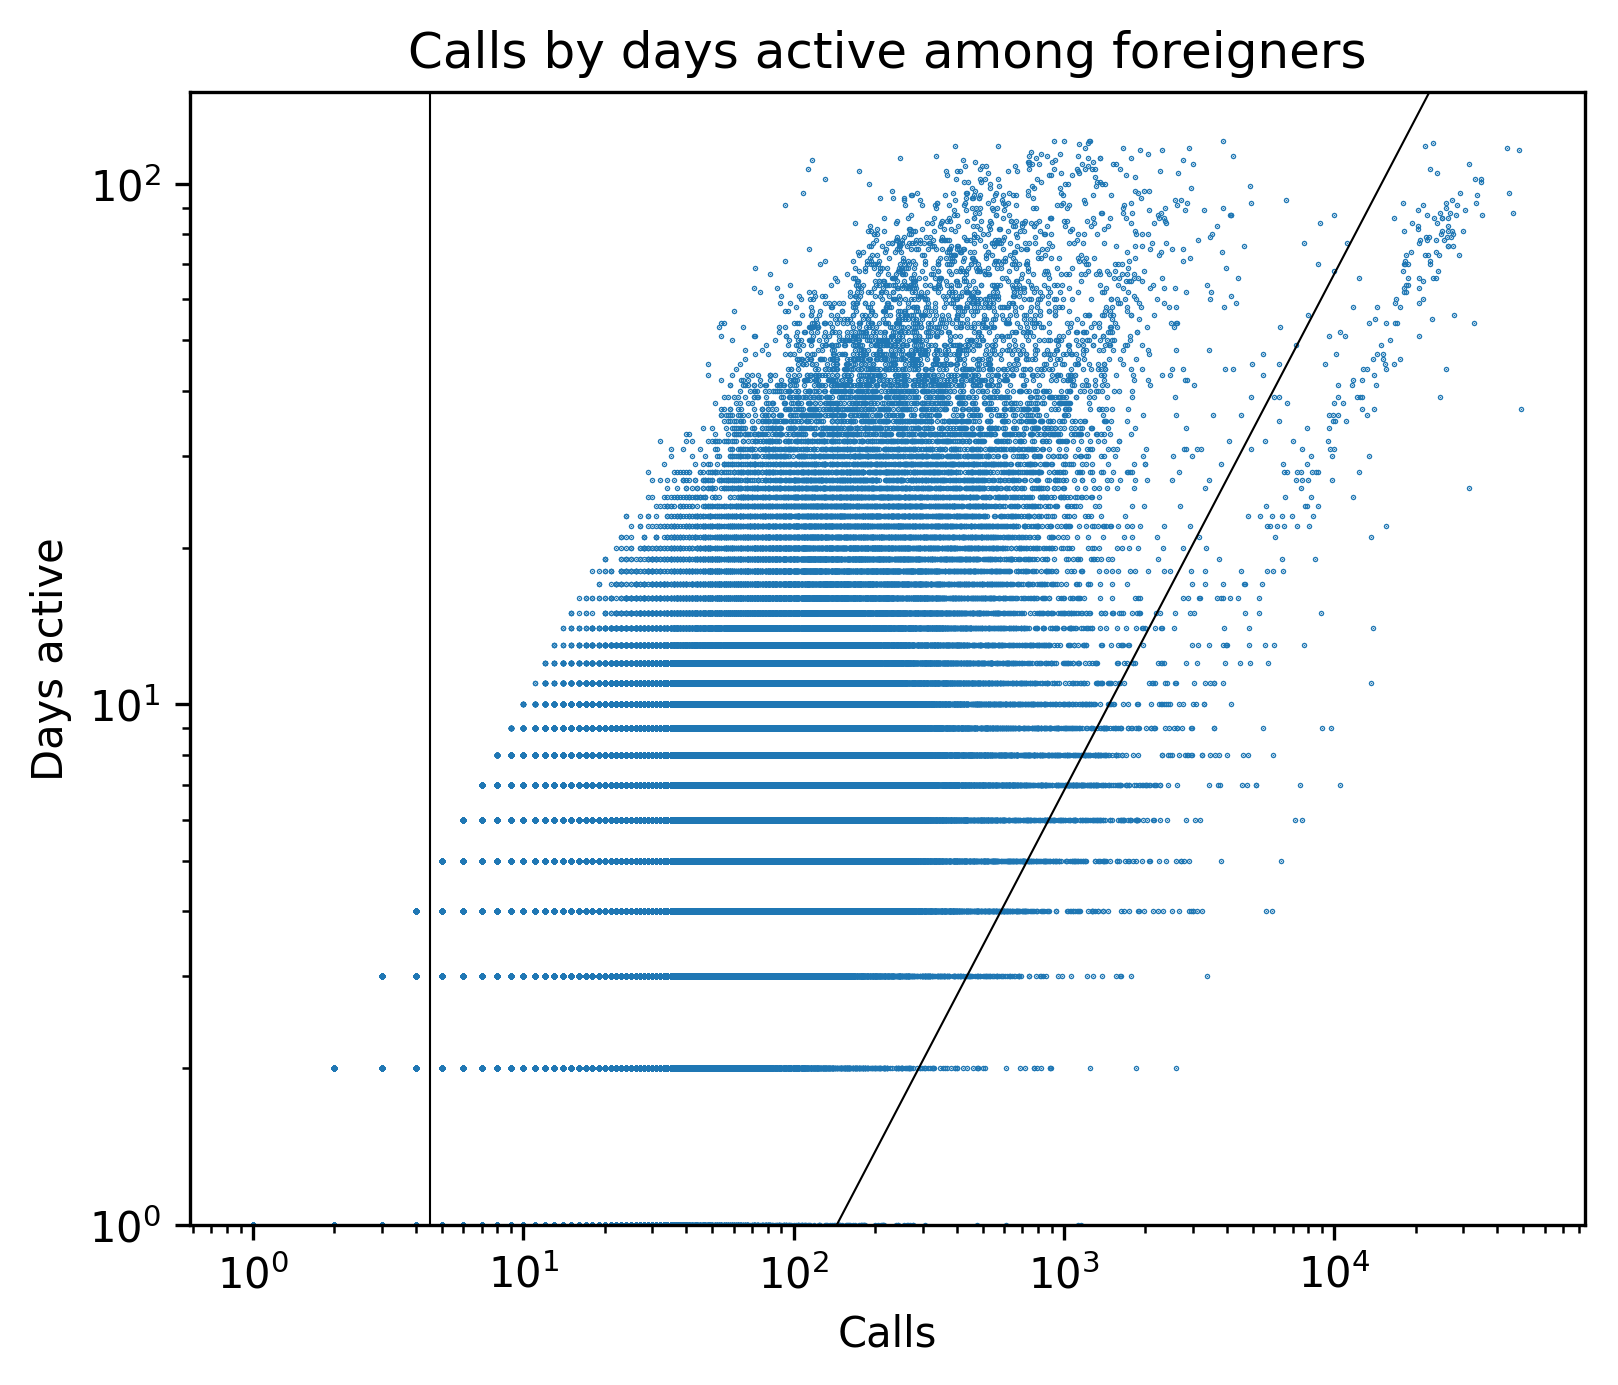

In [33]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['calls'],y=dfc['days_active'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Calls by days active among foreigners')
ax.set_xlabel('Calls')
ax.set_ylabel('Days active')
# x=[200, 200*200]
y=[1/10000, 1*200]
x2=[150/10000, 150*200]
# x3=[100, 100*400]
ylim([1,150])
# plt.plot(x,y,color='black',linewidth=.5)
plt.plot(x2,y,color='black',linewidth=.5)
# plt.plot(x3,y,color='black',linewidth=.5)
ax.axvline(4.5,color='black',linewidth=.5)
plt.show()

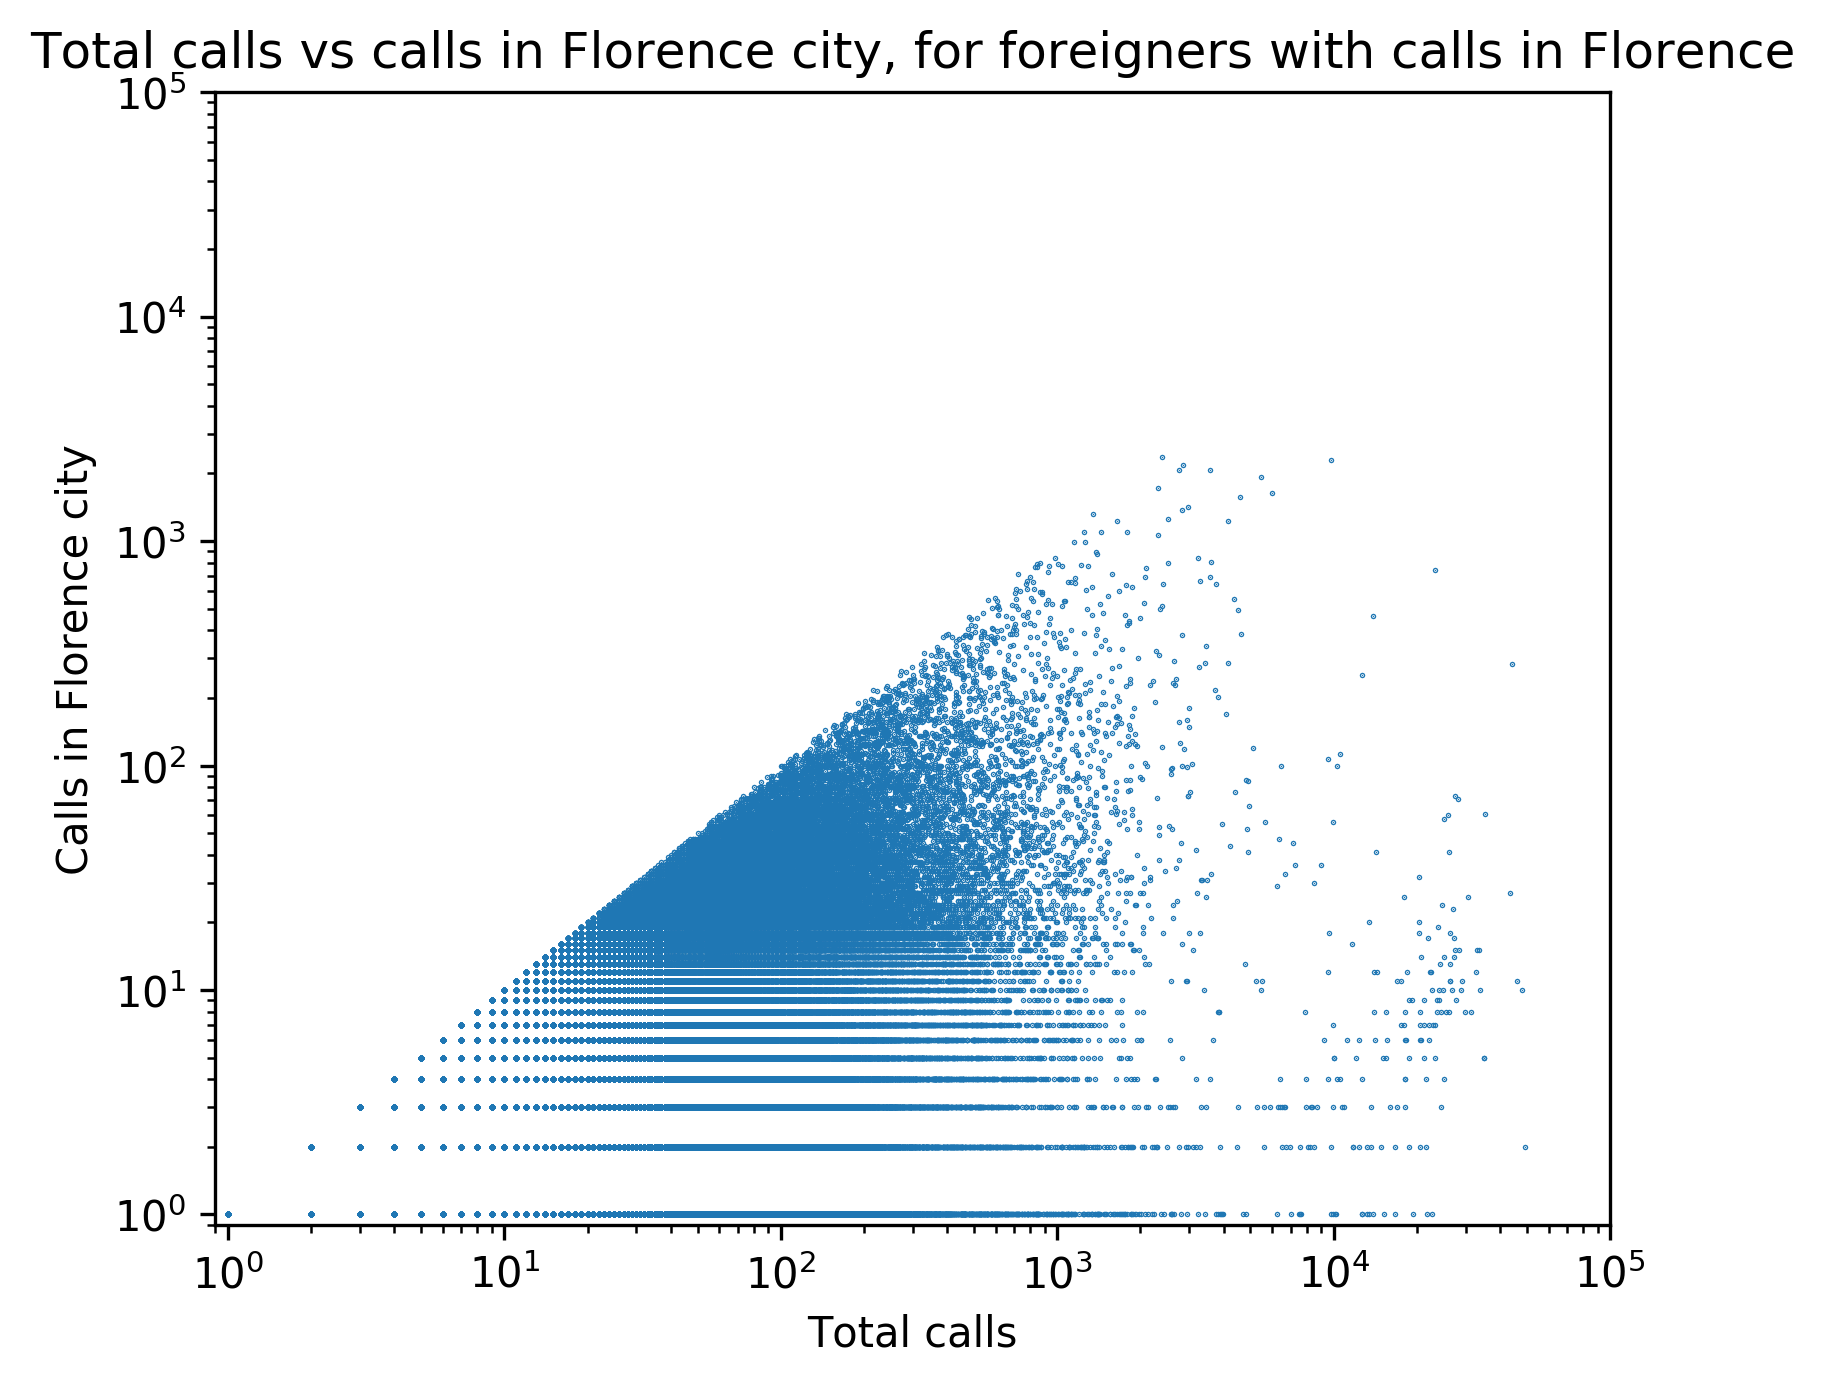

In [23]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['calls'],y=dfc['calls_in_florence_comune'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Total calls vs calls in Florence city, for foreigners with calls in Florence')
ax.set_xlabel('Total calls')
ax.set_ylabel('Calls in Florence city')
xlim([.9,10*10000])
ylim([.9,10*10000])
plt.show()

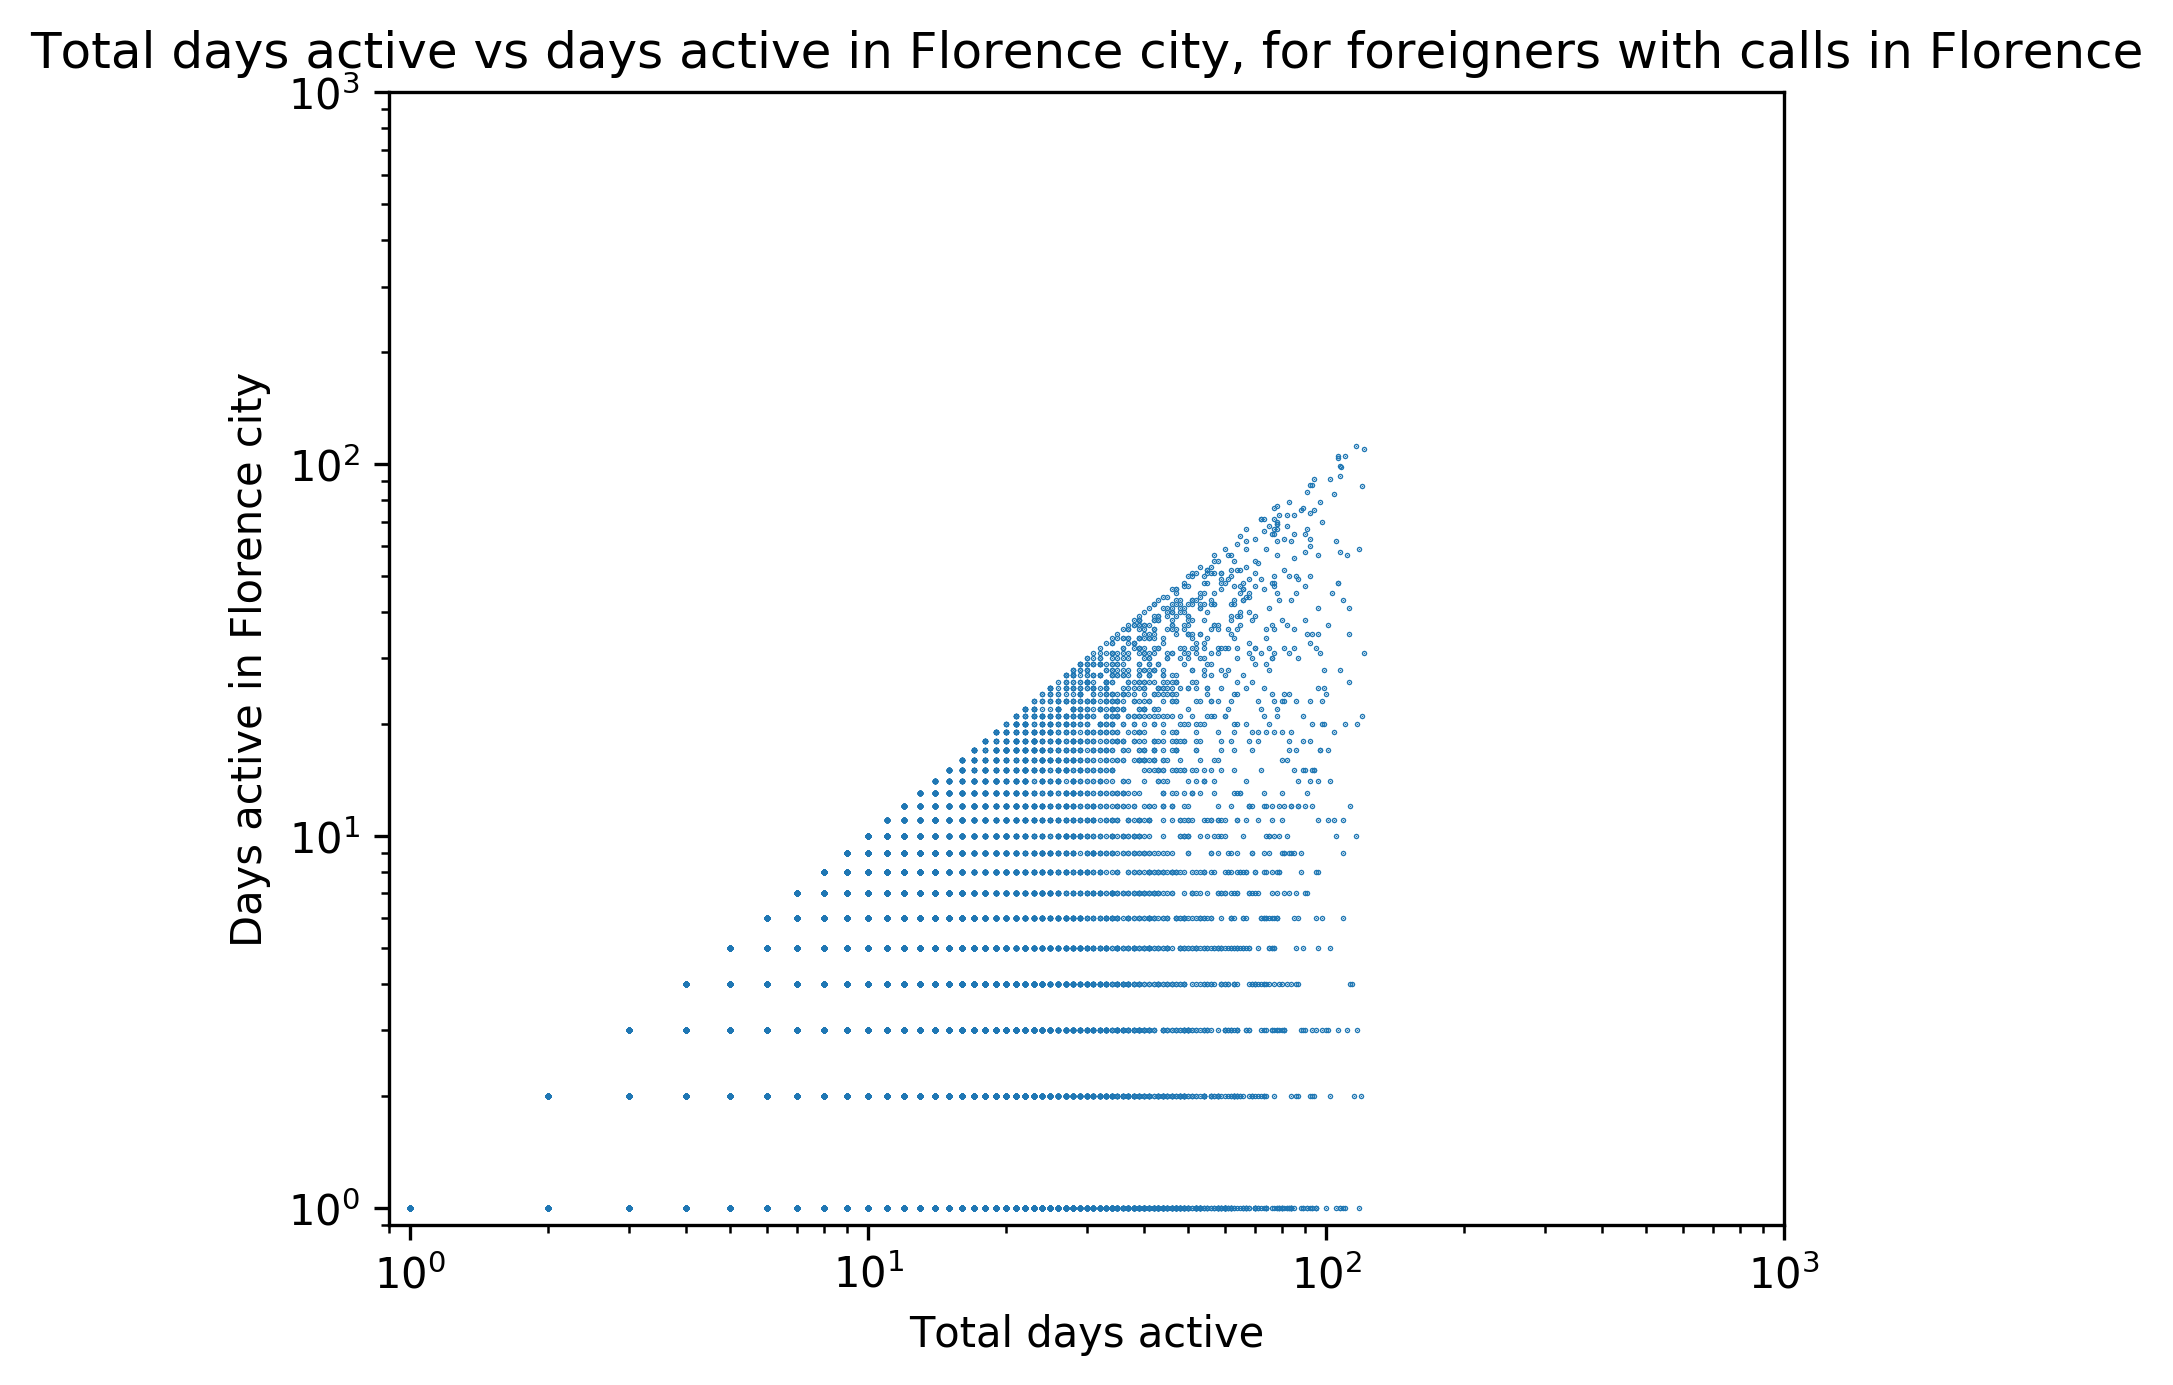

In [24]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['days_active'],y=dfc['days_active_in_florence_comune'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Total days active vs days active in Florence city, for foreigners with calls in Florence')
ax.set_xlabel('Total days active')
ax.set_ylabel('Days active in Florence city')
xlim([.9,10*100])
ylim([.9,10*100])
plt.show()

In [25]:
df3 = pd.read_csv("/mnt/data/shared/aws-data/restricted-data/CDR-data/cust_foreigners_timeseries_GEN.csv")
df3.head()

,cust_id,country,date_,calls,in_florence,in_florence_comune
0,123,Turkey,2016-07-28 00:00:00,3,3,0
1,123,Turkey,2016-07-29 00:00:00,33,33,7
2,123,Turkey,2016-07-30 00:00:00,4,4,2
3,123,Turkey,2016-07-31 00:00:00,24,11,10
4,123,Turkey,2016-08-01 00:00:00,52,0,0


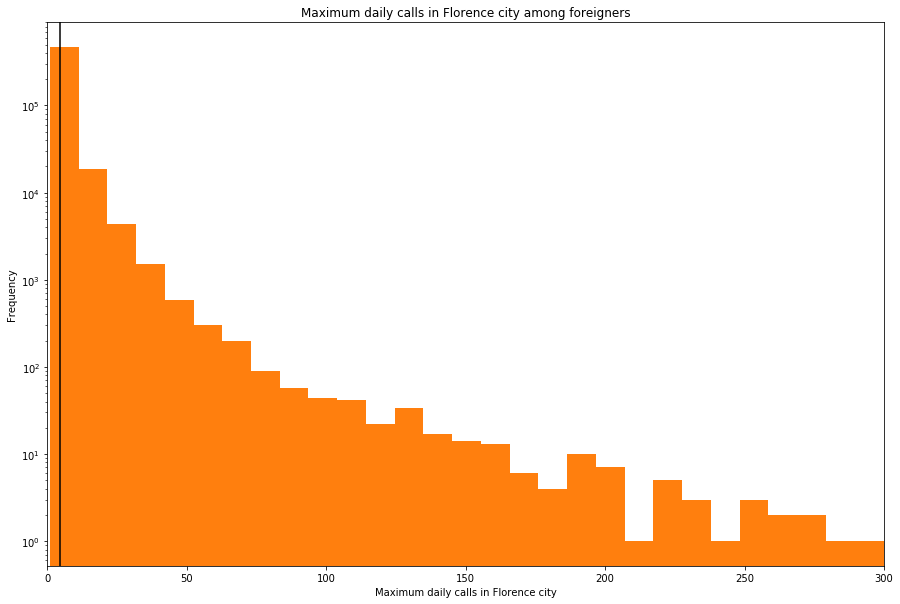

In [26]:
frc3 = df3.groupby(['cust_id'])['in_florence_comune'].max()

frc3.plot.hist(logy=True, figsize=(15,10), bins=2000)
plt.ylabel('Frequency')
plt.xlabel('Maximum daily calls in Florence city')
plt.axvline(4.5,color="black")
plt.xlim([0,300])
plt.title('Maximum daily calls in Florence city among foreigners')


# frc3.columns = ['frequency']
# frc3.index.name = 'calls'
# frc3.reset_index(inplace=True)
# frc3 = frc2.sort_values('calls')
# frc3['cumulative'] = frc2['frequency'].cumsum()/frc2['frequency'].sum()
# frc3['ccdf'] = 1 - frc2['cumulative']
frc3.plot.hist(bins=100)

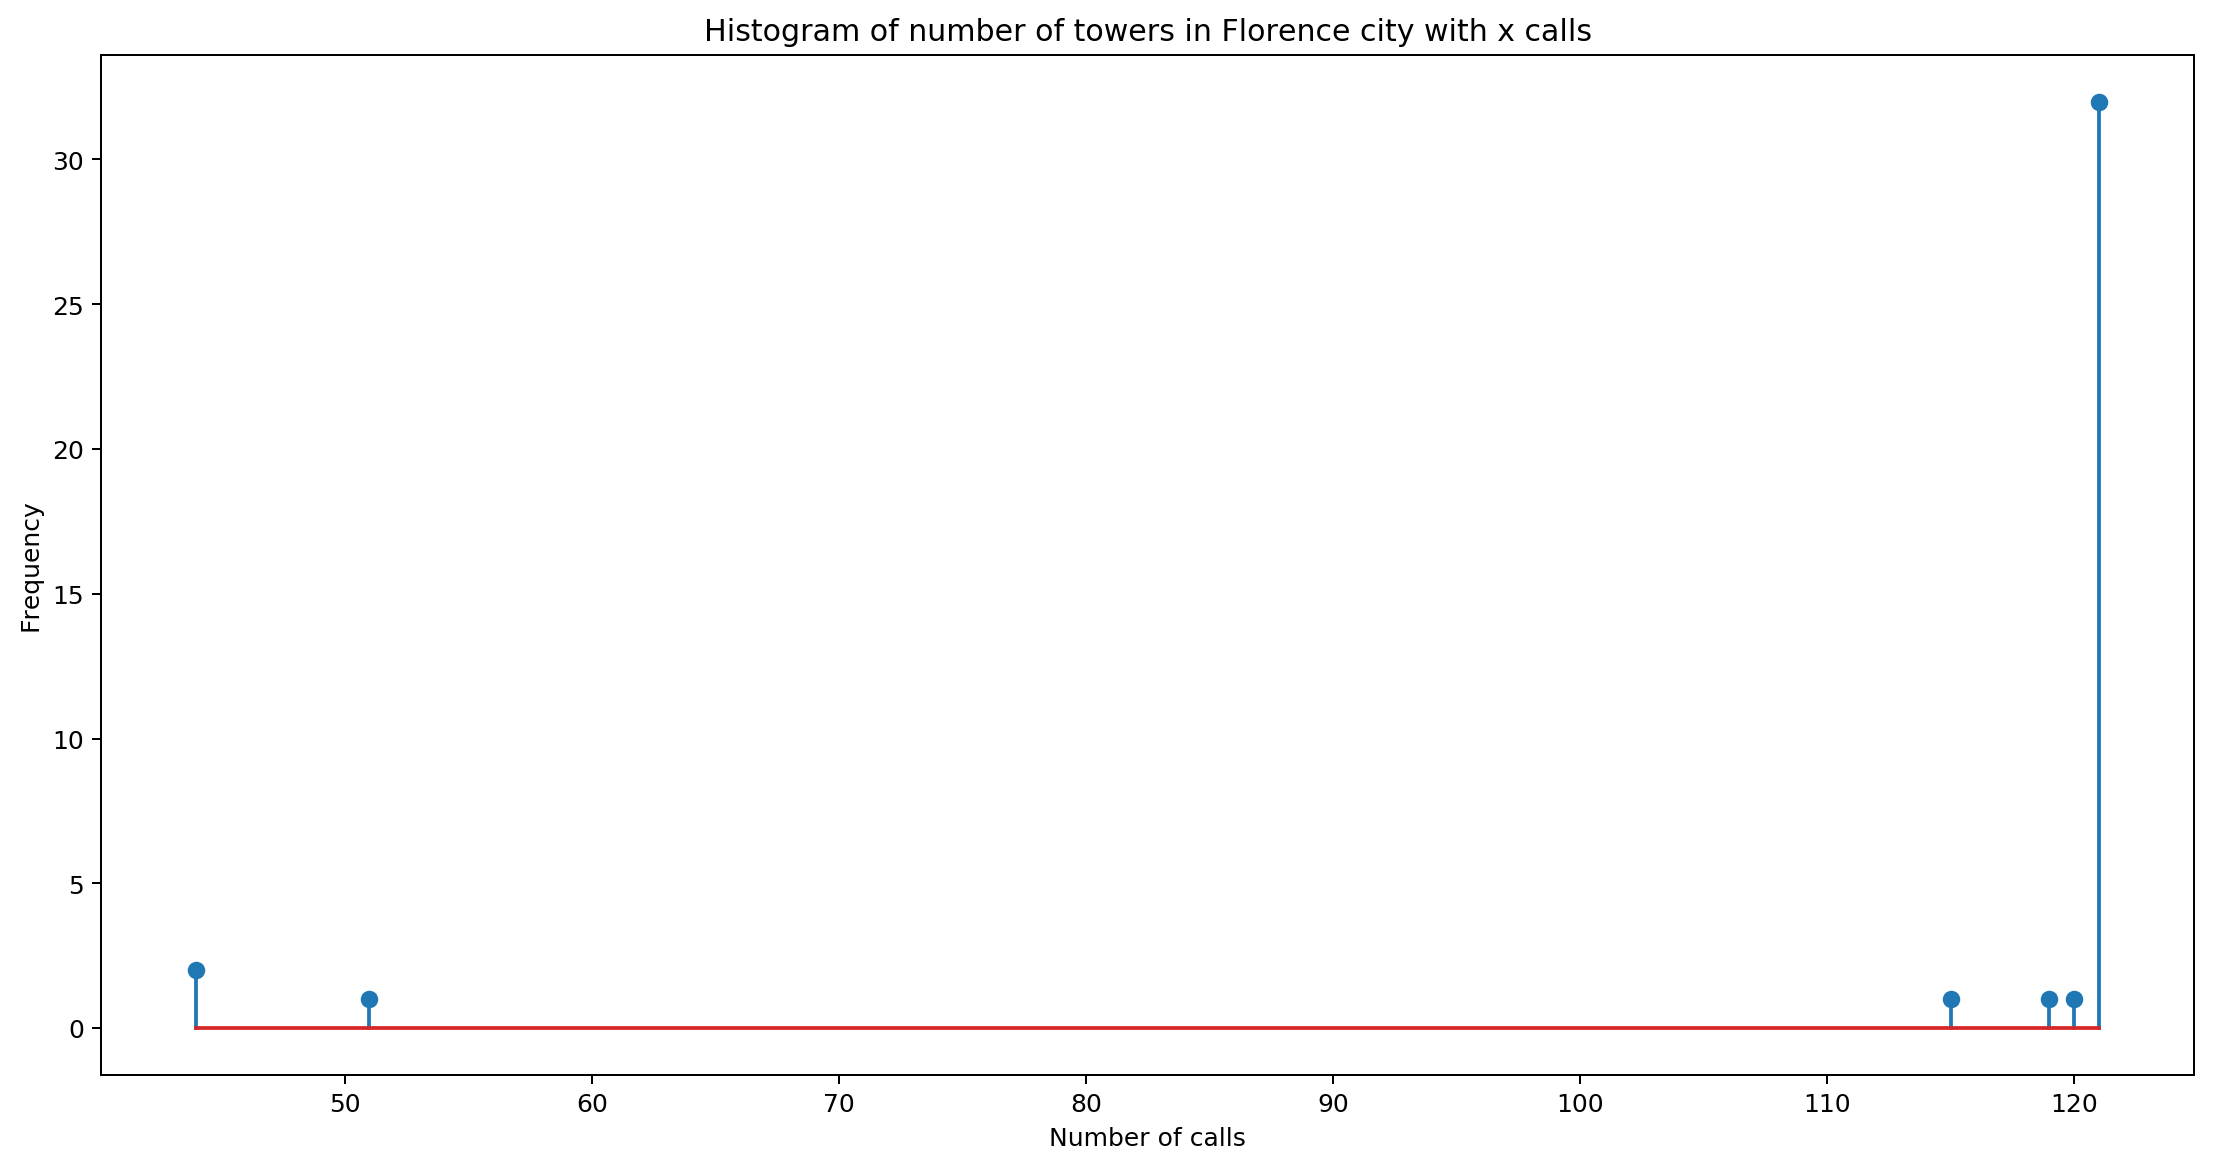

In [148]:
f, ax = plt.subplots(figsize=(15,7.5), dpi=180)
ax.stem(frt_dc['days'],frt_dc['frequency'], linestyle='steps--')
# yscale('log')
# xscale('log')
ax.set_title('Histogram of number of towers in Florence city with x calls')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of calls')
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(15,7.5), dpi=180)
ax.stem(frt_c['calls'],frt_c['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Histogram of number of towers in Florence city with x calls')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of calls')
plt.show()

In [22]:
'Sardegna' in data['home_region']

False

In [17]:
data_italians = pd.read_csv("./aws-data/firence_italians_3days_past_future_sample_1K_custs.csv", header=None)
data_italians.columns = ['lat', 'lon', 'date_time_m', 'home_region', 'cust_id', 'in_florence']
regions = np.array(data_italians['home_region'].unique())
regions

array(['home_region', 'Puglia', 'Emilia-Romagna', 'Toscana', 'Lombardia',
       'Campania', 'Umbria', 'Lazio', 'Piemonte', 'Liguria', 'Calabria',
       'Veneto', 'Basilicata', 'Friuli Venezia Giulia', 'Molise',
       'Trentino-Alto Adige', 'Marche', 'Sicilia', 'Abruzzo',
       "Valle D'Aosta", 'Sardegna'], dtype=object)

In [86]:
# x = np.linspace(0.1, 2*np.pi, 10)
# x

In [87]:
# np.cos(x)

In [88]:
# x = frc_uc['calls_in_florence_comune'].as_matrix()
# x

In [67]:
cda.head()

,cust_id,day_,count
0,11,2016-06-07,19
1,11,2016-06-08,16
2,11,2016-06-09,39
3,11,2016-06-10,2
4,11,2016-06-11,2


In [108]:
mcpdf = cdf.groupby('cust_id')['count'].mean().to_frame() # Mean calls per day, Florence
mcpdf.columns = ['mean_calls_per_day']
mcpdf = mcpdf.sort_values('mean_calls_per_day',ascending=False)
mcpdf.index.name = 'cust_id'
mcpdf.reset_index(inplace=True)
mcpdf.head()

,cust_id,mean_calls_per_day
0,22672249,999.333333
1,17781619,620.500000
2,20662741,605.888889
3,27959832,587.333333
4,12754963,570.500000


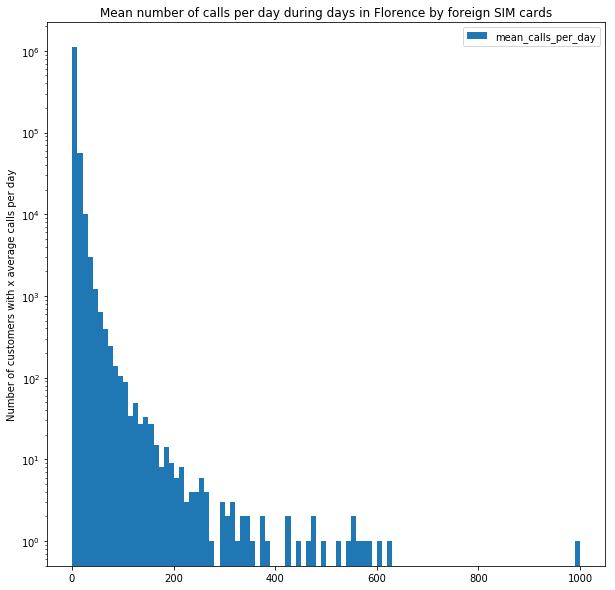

In [116]:
# mcpdf.plot(y='mean_calls_per_day', style='.', logy=True, figsize=(10,10))
mcpdf.plot.hist(y='mean_calls_per_day', logy=True, figsize=(10,10), bins=100)
plt.ylabel('Number of customers with x average calls per day')
# plt.xlabel('Customer rank')
plt.title('Mean number of calls per day during days in Florence by foreign SIM cards')

In [ ]:
cvd = udf.merge(drf, left_on='cust_id', right_on='cust_id', how='outer') # Count versus days
cvd.plot.scatter(x='days', y='count', s=.1, figsize = (10, 10))
plt.ylabel('Number of calls')
plt.xlabel('Duration between first and last days active')
plt.title('Calls versus duration of records of foreign SIMs in Florence')

In [43]:
fr = drf['days'].value_counts().to_frame() # NOTE: FIGURE OUT HOW TO ROUND, NOT TRUNCATE
fr.columns = ['frequency']
fr.index.name = 'days'
fr.reset_index(inplace=True)
fr = fr.sort_values('days')
fr['cumulative'] = fr['frequency'].cumsum()/fr['frequency'].sum()

The code below creates a calls-per-person frequency distribution, which is the first thing we want to see. 

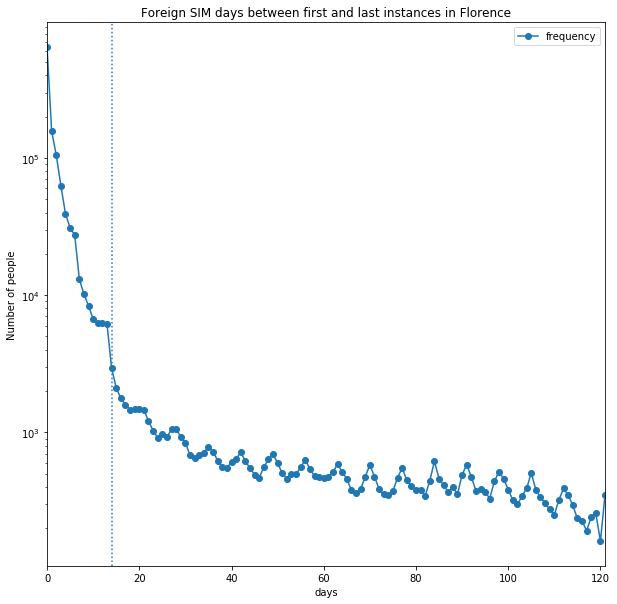

In [44]:
fr.plot(x='days', y='frequency', style='o-', logy=True, figsize = (10, 10))
plt.ylabel('Number of people')
plt.axvline(14,ls='dotted')
plt.title('Foreign SIM days between first and last instances in Florence')

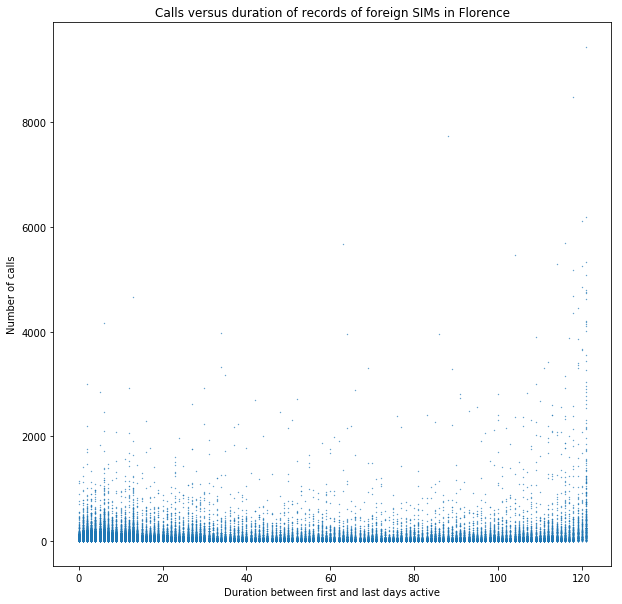

In [62]:
cvd = udf.merge(drf, left_on='cust_id', right_on='cust_id', how='outer') # Count versus days
cvd.plot.scatter(x='days', y='count', s=.1, figsize = (10, 10))
plt.ylabel('Number of calls')
plt.xlabel('Duration between first and last days active')
plt.title('Calls versus duration of records of foreign SIMs in Florence')

Plot this distribution. This shows that 19344 people made 1 call over the 4 months, 36466 people made 2 calls over the 4 months, 41900 people made 3 calls over the 4 months, etc. 

In [58]:
fr = udf['count'].value_counts().to_frame()
fr.columns = ['frequency']
fr.index.name = 'calls'
fr.reset_index(inplace=True)
fr = fr.sort_values('calls')
fr['cumulative'] = fr['frequency'].cumsum()/fr['frequency'].sum()
fr.head()

,calls,frequency,cumulative
0,1,220340,0.185261
1,2,157332,0.317544
2,3,115733,0.414852
3,4,88833,0.489542
4,5,70910,0.549163


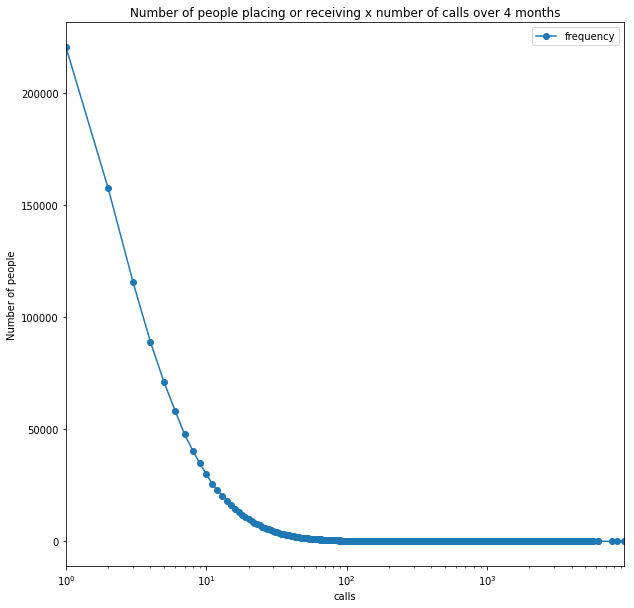

In [82]:
fr.plot(x='calls', y='frequency', style='o-', logx=True, figsize = (10, 10))
# plt.axvline(5,ls='dotted')
plt.ylabel('Number of people')
plt.title('Number of people placing or receiving x number of calls over 4 months')

It might be more helpful to look at a cumulative distribution curve, from which we can read off quantiles (e.g., this percentage of the people in the data set had x or more calls, x or fewer calls). Specifically, 10% of people have 3 or fewer calls over the entire period, 25% have 7 of fewer, 33% have 10 or fewer, 50% have 17 of fewer calls, etc., all the way up to 90% of people having 76 or fewer calls. 

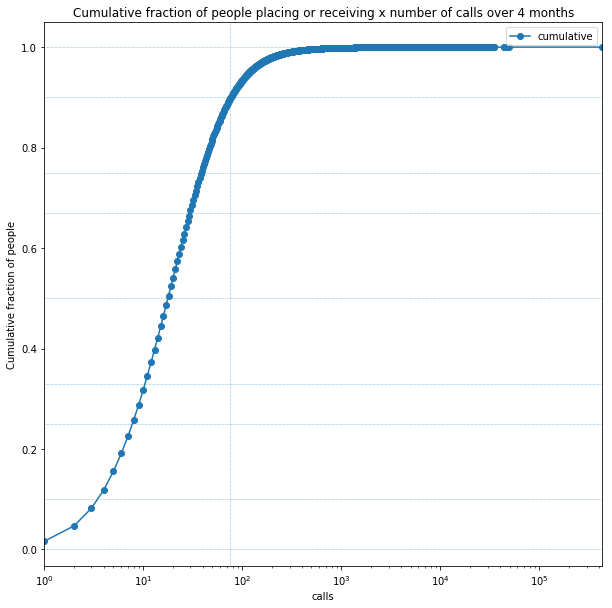

In [5]:
fr.plot(x='calls', y='cumulative', style='o-', logx=True, figsize = (10, 10))
plt.axhline(1.0,ls='dotted',lw=.5)
plt.axhline(.90,ls='dotted',lw=.5)
plt.axhline(.75,ls='dotted',lw=.5)
plt.axhline(.67,ls='dotted',lw=.5)
plt.axhline(.50,ls='dotted',lw=.5)
plt.axhline(.33,ls='dotted',lw=.5)
plt.axhline(.25,ls='dotted',lw=.5)
plt.axhline(.10,ls='dotted',lw=.5)
plt.axhline(0.0,ls='dotted',lw=.5)
plt.axvline(max(fr['calls'][fr['cumulative']<.90]),ls='dotted',lw=.5)
plt.ylabel('Cumulative fraction of people')
plt.title('Cumulative fraction of people placing or receiving x number of calls over 4 months')

We also want to look at the number of unique lat-long addresses, which will (roughly) correspond to either where cell phone towers are, and/or the level of truncation. This takes too long in pandas, so we use postgres, piping the results of the query,
```
\o towers_with_counts.txt
select lat, lon, count(*) as calls, count(distinct cust_id) as users, count(distinct date_trunc('day', date_time_m) ) as days from optourism.cdr_foreigners group by lat, lon order by calls desc;
\q
```
into the file towers_with_counts.txt. This is followed by the bash command
```
cat towers_with_counts.txt | sed s/\ \|\ /'\t'/g | sed s/\ //g | sed 2d > towers_with_counts2.txt
```
to clean up the postgres output format. 

In [13]:
df2 = pd.read_table("./aws-data/towers_with_counts2.txt")
df2.head()

,lat,lon,count
0,43.771,11.254,839141.0
1,43.775,11.252,670489.0
2,43.772,11.264,513066.0
3,43.777,11.248,484600.0
4,43.77,11.247,446210.0


Do the same thing as above. 

In [14]:
fr2 = df2['count'].value_counts().to_frame()
fr2.columns = ['frequency']
fr2.index.name = 'count'
fr2.reset_index(inplace=True)
fr2 = fr2.sort_values('count')
fr2['cumulative'] = fr2['frequency'].cumsum()/fr2['frequency'].sum()
fr2.head()

,count,frequency,cumulative
0,1.0,66,0.003344
15,2.0,54,0.006080
19,3.0,51,0.008663
56,4.0,42,0.010791
36,5.0,46,0.013122


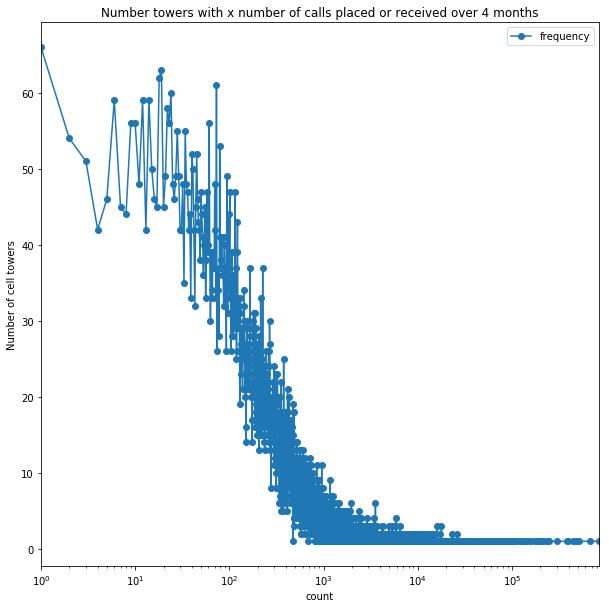

In [18]:
fr2.plot(x='count', y='frequency', style='o-', logx=True, figsize = (10, 10))
# plt.axvline(5,ls='dotted')
plt.ylabel('Number of cell towers')
plt.title('Number of towers with x number of calls placed or received over 4 months')

Unlike the previous plot, this is not very clean at all, making the cumulative distribution plot critical. 

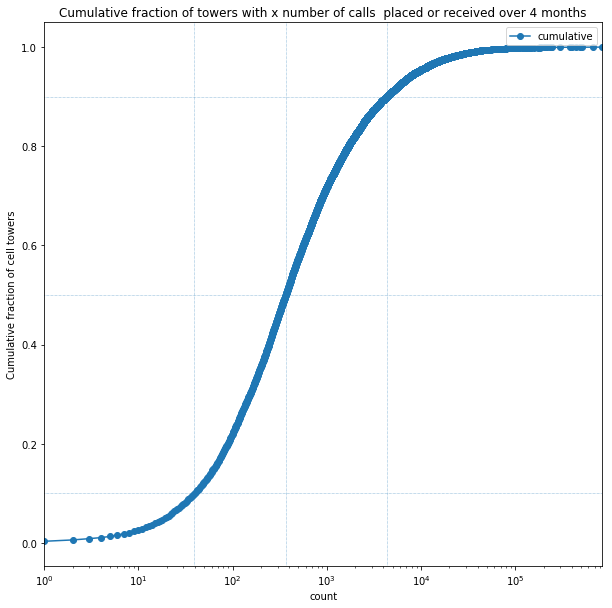

In [21]:
fr2.plot(x='count', y='cumulative', style='o-', logx=True, figsize = (10, 10))
plt.axhline(0.1,ls='dotted',lw=.5)
plt.axvline(max(fr2['count'][fr2['cumulative']<.10]),ls='dotted',lw=.5)
plt.axhline(0.5,ls='dotted',lw=.5)
plt.axvline(max(fr2['count'][fr2['cumulative']<.50]),ls='dotted',lw=.5)
plt.axhline(0.9,ls='dotted',lw=.5)
plt.axvline(max(fr2['count'][fr2['cumulative']<.90]),ls='dotted',lw=.5)
plt.ylabel('Cumulative fraction of cell towers')
plt.title('Cumulative fraction of towers with x number of calls  placed or received over 4 months')

Now, we want to look at temporal data. First, convert the categorical `date_time_m` to a datetime object; then, extract the date component. 

In [6]:
df['datetime'] = pd.to_datetime(df['date_time_m'], format='%Y-%m-%d %H:%M:%S')
df['date'] = df['datetime'].dt.floor('d') # Faster than df['datetime'].dt.date

In [8]:
df2 = df.groupby(['cust_id','date']).size().to_frame()
df2.columns = ['count']
df2.index.name = 'date'
df2.reset_index(inplace=True)
df2.head(20)

,cust_id,date,count
0,11,2016-06-07,19
1,11,2016-06-08,16
2,11,2016-06-09,39
3,11,2016-06-10,2
4,11,2016-06-11,2
5,11,2016-06-12,6
6,11,2016-09-09,5
7,11,2016-09-12,10
8,123,2016-07-28,3
9,123,2016-07-29,33


In [9]:
df3 = (df2.groupby('cust_id')['date'].max() - df2.groupby('cust_id')['date'].min()).to_frame()
df3['calls'] = df2.groupby('cust_id')['count'].sum()
df3.columns = ['days','calls']
df3['days'] = df3['days'].dt.days
df3.head()

,days,calls
cust_id,,
11,97,99
123,5,157
158,98,391
193,6,83
244,35,31


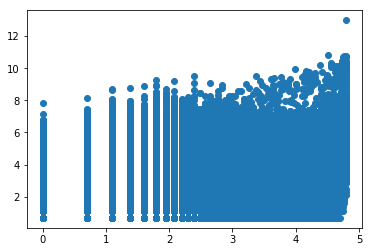

In [17]:
fr = df['cust_id'].value_counts().to_frame()['cust_id'].value_counts().to_frame()

# plt.scatter(np.log(df3['days']), np.log(df3['calls']))
# plt.show()

,cust_id,date,count
0,11,2016-06-07,19
1,11,2016-06-08,16
2,11,2016-06-09,39
3,11,2016-06-10,2
4,11,2016-06-11,2


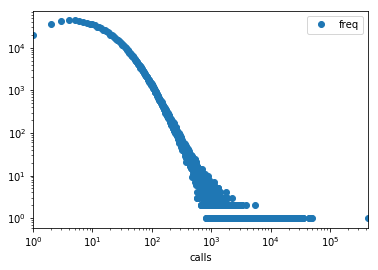

In [77]:
fr.plot(x='calls', y='freq', style='o', logx=True, logy=True)

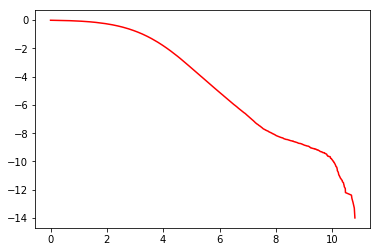

In [97]:
x=np.log(fr['calls'])
y=np.log(1-fr['freq'].cumsum()/fr['freq'].sum())
plt.plot(x, y, 'r-')

In [ ]:
# How many home_Regions
np.count_nonzero(data['home_region'].unique())

In [ ]:
# How many customers
np.count_nonzero(data['cust_id'].unique())

In [ ]:
# How many Nulls are there in the customer ID column?
df['cust_id'].isnull().sum()

In [ ]:
# How many missing data are there in the customer ID?
len(df['cust_id']) - df['cust_id'].count()

In [3]:
df['cust_id'].unique()

array([      11,      123,      158, ..., 30719015, 30719030, 30719039])